# **PROGRAMMING FOR DATA SCIENCE: Final Project**

**Student:** Anna Bicelli <br> 
**ID:** VR509594

# **Part 1:** dataset import

brief explanation of the dataset, where I found it and waht i analyzes and what it contains
link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata


It reports the listing activity of homestays in New York City

**packages:**

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import  plotly.express as px

In [3]:
# Load CSV file into DataFrame
airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


C:\Users\bicel\AppData\Local\Temp\ipykernel_6612\4082681128.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


Since this dataset in column 25 has some mixted types values, I've to check them

In [4]:
airbnb_df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [5]:
airbnb_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,1001254,1002102,1002403,1002755,1003689,1004098,1004650,1005202,1005754,1006307,1006859,1007411,1007964,1008516,1009068
NAME,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm,Beautiful 1br on Upper West Side,Central Manhattan/near Broadway,"Lovely Room 1, Garden, Best Area, Legal rental",Wonderful Guest Bedroom in Manhattan for SINGLES
host id,80014485718,52335172823,78829239556,85098326012,92037596077,45498551794,61300605564,90821839709,79384379533,75527839483,1280143094,18824631834,88136055909,26802410424,88920244552
host_identity_verified,unconfirmed,verified,NaN,unconfirmed,verified,verified,NaN,unconfirmed,verified,unconfirmed,verified,verified,verified,verified,verified
host name,Madaline,Jenna,Elise,Garry,Lyndon,Michelle,Alberta,Emma,Evelyn,Carl,Miranda,Alan,NaN,Darcy,Leonardo
neighbourhood group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,brookln,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown,Upper West Side,Hell's Kitchen,South Slope,Upper West Side
lat,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.68688,40.76489,40.80178,40.71344,40.80316,40.76076,40.66829,40.79826
long,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.95596,-73.98493,-73.96723,-73.99037,-73.96545,-73.98867,-73.98779,-73.96113
country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States


In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [7]:
airbnb_df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

to check which is the problematic column:

In [8]:
airbnb_df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

vedo che gli indici di colonna devono essere sistemati, lo farò in seguito, ora proseguo con la ricerca dei valori problematici che sono contenuti nella 25esima colonna

In [9]:
column25 = airbnb_df.columns[24]  # the first index is 0 so the 25th column has index 24
print(column25)

house_rules


the problematic columns has name `house_rules`

now I've to check her values to see what is the problem

In [10]:
print(f"percentage of house_rules NA value: \t\t\t{(airbnb_df['house_rules'].isna().sum() / len(airbnb_df)) * 100:.2f}%")

percentage of house_rules NA value: 			50.81%


In [11]:
airbnb_df.house_rules.value_counts()

house_rules
#NAME?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Since this dataset in column 25, that is the column house_rules, has the value #NAME? that is a different type from all other values in this column, I can choose one of this four options:
* set low_memory=False when importing the csv file<br>    airbnb_df = pd.read_csv('Airbnb_Open_Data.csv', low_memory=False)<br>    --> however if I ever need to use this column during EDA I may have problems
* replace the values #NAME? with null values NaN --><br>    airbnb_df=pd.read_csv('Airbnb_Open_Data.csv', na_values='#NAME?') <br>  or in this way <br>     airbnb_df=airbnb_df.replace('#NAME?', np.nan)<br>   --> I'll get more null values in the house_rules column
* since all the other values in this column are strings, I can turn all the values (strings,NaN and #NAME?) into strings <br>    airbnb_df.house_rules=airbnb.house_rules.astype(str)<br>     --> I'll not have more null values in the column
* drop the column house_rules because it is not is not relevant for this analysis<br>
airbnb_df.drop( column = ["house_rules"], inplace = True)

ELIMINO?

as you cann se there's the value **#HOUSE?** that is problematic, it can cause some problems during the analysis so I can **replace** these values with *NaN*:

In [12]:
airbnb_df=airbnb_df.replace('#NAME?', np.nan)

In [13]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102329 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102191 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

now i have more null values in the `house_rules` column obviuosly

In [14]:
airbnb_df.isnull().sum()

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

I want to check that there are no more problematic values in the `house_rules` columns

In [15]:
airbnb_df.house_rules.value_counts()

house_rules
House Rules 1. Check-in is 4 pm local time. If the unit is ready earlier, we’ll let you know. Check-out is normally 11 am local time, but we’d be happy to extend it as long as we don’t have a cleaning scheduled. Just let us know.  2. All bookings require a security deposit of at least $300, which will be refunded within 7 days of your check-out. 3. For security measures we require all guests to provide proof of identification through ID verification on our own website. In order to check in we'll need a photo of your ID.  4. Our cancellation policy is as shown on our ad and defined by the site you are booking through.  5. Don’t let $300 go up in smoke. There's no smoking allowed in any Flatbook and a $300 fine for breaking this rule.  6. Unfortunately we don’t allow pets in any of our apartments. 7. Unless you’re staying in one of our specialty apartments, we don’t allow parties or excessive noise. 8. If we find the place very messy, we have to charge an extra $40 for every 

i don't have problematic values anymore and i can start my analysis.<br>As seen before, gli indici di colonna devono essere sistemati: 

In [16]:
airbnb_df.columns = airbnb_df.columns.map(lambda x: x.lower().replace(' ', '_'))

In [17]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [18]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102329 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102191 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [19]:
airbnb_df.shape

(102599, 26)

observing the size of the dataset it has 26 columns and 102599 rows, so I can see which variables have an eccessive number of NA values

In [20]:
print(sum(airbnb_df.isna().sum()))
print(airbnb_df.duplicated().sum())

193503
541


# Null values

to check in which columns I've more null values:

In [21]:
airbnb_df.isnull().sum()

id                                     0
name                                 270
host_id                                0
host_identity_verified               289
host_name                            408
neighbourhood_group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country_code                         131
instant_bookable                     105
cancellation_policy                   76
room_type                              0
construction_year                    214
price                                247
service_fee                          273
minimum_nights                       409
number_of_reviews                    183
last_review                        15893
reviews_per_month                  15879
review_rate_number                   326
calculated_host_listings_count       319
availability_365                     448
house_rules     

le colonne price e service fee tolgo il dollar dign $ and the commas e le trasformo da object to float:

In [22]:
airbnb_df.price = airbnb_df.price.replace({'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df.price

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102599, dtype: float64

In [23]:
airbnb_df.service_fee = airbnb_df.service_fee.replace({'\$': '', ',': ''}, regex=True).astype(float)
airbnb_df.service_fee 


0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service_fee, Length: 102599, dtype: float64

In [24]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102329 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102191 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

these columns are of different types: **object**, **float**, **integer**, so I prefer to divide them in order to see better which columns contain float values, integers and objects

In [25]:
# Null values in columns of float type
null_float_columns = airbnb_df.select_dtypes(include=['float']).isnull().sum()
print("Null values in columns of float type:")
print(null_float_columns)

# Null values in columns of object type
null_text_columns = airbnb_df.select_dtypes(include=['object']).isnull().sum()
print("\nNull values in columns of object type:")
print(null_text_columns)

# Null values in columns of integer type
null_int_columns = airbnb_df.select_dtypes(include=['int']).isnull().sum()
print("\nNull values in columns of integer type:")
print(null_int_columns)

Null values in columns of float type:
lat                                   8
long                                  8
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
dtype: int64

Null values in columns of object type:
name                         270
host_identity_verified       289
host_name                    408
neighbourhood_group           29
neighbourhood                 16
country                      532
country_code                 131
instant_bookable             105
cancellation_policy           76
room_type                      0
last_review                15893
house_rules                54843
license                   102597
dtype: int64

Null values in columns of 

In [26]:
#for float variables
print("Percentage of null values in columns of float type:")
print(f"percentage of lat NA value: \t\t\t\t\t\t{(airbnb_df['lat'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of long NA value: \t\t\t\t\t\t{(airbnb_df['long'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of price NA value:\t\t\t\t {(airbnb_df['price'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of service_fee NA value:\t\t\t {(airbnb_df['service_fee'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of construction_year NA value: \t\t\t\t{(airbnb_df['construction_year'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of minimum_nights NA value: \t\t\t\t\t{(airbnb_df['minimum_nights'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of number_of_reviews NA value: \t\t\t\t{(airbnb_df['number_of_reviews'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of reviews_per_month NA value: \t\t\t\t{(airbnb_df['reviews_per_month'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of review_rate_number NA value: \t\t\t\t{(airbnb_df['review_rate_number'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of calculated_host_listings_count NA value: \t\t\t{(airbnb_df['calculated_host_listings_count'].isna().sum()/len(airbnb_df))*100:.2f}%")
print(f"percentage of availability_365 NA value: \t\t\t\t{(airbnb_df['availability_365'].isna().sum()/len(airbnb_df))*100:.2f}%")

Percentage of null values in columns of float type:
percentage of lat NA value: 						0.01%
percentage of long NA value: 						0.01%
percentage of price NA value:				 0.24%
percentage of service_fee NA value:			 0.27%
percentage of construction_year NA value: 				0.21%
percentage of minimum_nights NA value: 					0.40%
percentage of number_of_reviews NA value: 				0.18%
percentage of reviews_per_month NA value: 				15.48%
percentage of review_rate_number NA value: 				0.32%
percentage of calculated_host_listings_count NA value: 			0.31%
percentage of availability_365 NA value: 				0.44%


Based on these information the null values related to *float* data can be **replaced** with their **mean value** because the percentage are aroud? 0.<br>
**Remove** the variable `reviews_per_month`,  from the variable itself. The percentage of null values is excessive and would not lead to useful information for the entire population of the dataset.<br>
**Drop** the NaN values in the columns `price` and `service_fee`.

In [27]:
lat_mean = airbnb_df['lat'].mean()
airbnb_df['lat'].fillna(lat_mean, inplace=True)

long_mean = airbnb_df['long'].mean()
airbnb_df['long'].fillna(long_mean, inplace=True)

construction_year_mean = airbnb_df['construction_year'].mean()
airbnb_df['construction_year'].fillna(construction_year_mean, inplace=True)

minimum_nights_mean = airbnb_df['minimum_nights'].mean()
airbnb_df['minimum_nights'].fillna(minimum_nights_mean, inplace=True)

number_of_reviews_mean = airbnb_df['number_of_reviews'].mean()
airbnb_df['number_of_reviews'].fillna(number_of_reviews_mean, inplace=True)

review_rate_number_mean = airbnb_df['review_rate_number'].mean()
airbnb_df['review_rate_number'].fillna(review_rate_number_mean, inplace=True)

calculated_host_listings_count_mean = airbnb_df['calculated_host_listings_count'].mean()
airbnb_df['calculated_host_listings_count'].fillna(calculated_host_listings_count_mean, inplace=True)

availability_365_mean = airbnb_df['availability_365'].mean()
airbnb_df['availability_365'].fillna(availability_365_mean, inplace=True)

In [28]:
airbnb_df.drop(columns = [ "reviews_per_month"], axis=1, inplace = True)

In [29]:
airbnb_df.dropna(subset=['price'],inplace=True)
airbnb_df.dropna(subset=['service_fee'],inplace=True)


In [30]:
airbnb_df.isnull().sum()

id                                     0
name                                 267
host_id                                0
host_identity_verified               284
host_name                            403
neighbourhood_group                   28
neighbourhood                         15
lat                                    0
long                                   0
country                              527
country_code                         122
instant_bookable                      96
cancellation_policy                   71
room_type                              0
construction_year                      0
price                                  0
service_fee                            0
minimum_nights                         0
number_of_reviews                      0
last_review                        15843
review_rate_number                     0
calculated_host_listings_count         0
availability_365                       0
house_rules                        54551
license         

In [31]:
# for object type
print("Percentage of null values in columns of text or object type:")
print(f"\npercentage of name NA value: \t\t\t\t{(airbnb_df['name'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of host_identity_verified NA value:\t\t {(airbnb_df['host_identity_verified'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of host_name NA value:\t\t\t {(airbnb_df['host_name'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of neighbourhood_group NA value:\t\t {(airbnb_df['neighbourhood_group'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of neighbourhood NA value: \t\t\t{(airbnb_df['neighbourhood'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of country NA value:\t\t\t\t {(airbnb_df['country'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of country_code NA value: \t\t\t{(airbnb_df['country_code'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of instant_bookable NA value:\t\t {(airbnb_df['instant_bookable'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of cancellation_policy NA value:\t\t{(airbnb_df['cancellation_policy'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of last_review NA value: \t\t\t{(airbnb_df['last_review'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of house_rules NA value: \t\t\t{(airbnb_df['house_rules'].isna().sum() / len(airbnb_df)) * 100:.2f}%")
print(f"percentage of license NA value: \t\t\t{(airbnb_df['license'].isna().sum() / len(airbnb_df)) * 100:.3f}%")

Percentage of null values in columns of text or object type:

percentage of name NA value: 				0.26%
percentage of host_identity_verified NA value:		 0.28%
percentage of host_name NA value:			 0.39%
percentage of neighbourhood_group NA value:		 0.03%
percentage of neighbourhood NA value: 			0.01%
percentage of country NA value:				 0.52%
percentage of country_code NA value: 			0.12%
percentage of instant_bookable NA value:		 0.09%
percentage of cancellation_policy NA value:		0.07%
percentage of last_review NA value: 			15.52%
percentage of house_rules NA value: 			53.42%
percentage of license NA value: 			99.998%


The percentage of null values in the `last_review`, `house_rules` (as seen before) and `license` variables is excessive and would not lead to useful information so I can **drop** these columns.
<br>The `house_rules` column è quella in cui erano presenti valori problematici che ho sostituito con valori nulli, essendo nulli più della metà dei valori di questa variabile, significa che posso eliminare la colonna.

In [32]:
airbnb_df.drop(columns = ["license","house_rules", "last_review"], axis=1, inplace = True)

In [33]:
airbnb_df.shape

(102113, 22)

Vedo che le dimensioni del dataframe si sono ridotte dopo aver eliminato le quattro colonne indesiderate.<br>
The null values related to *object* variables can be replaced with the **mode** that is the value that occurs the most in the variable, so it doesn't change the distribution a lot

In [34]:
name_mode = airbnb_df['name'].mode()[0]
airbnb_df['name'].fillna(name_mode, inplace=True)

host_identity_verified_mode = airbnb_df['host_identity_verified'].mode()[0]
airbnb_df['host_identity_verified'].fillna(host_identity_verified_mode, inplace=True)

host_name_mode = airbnb_df['host_name'].mode()[0]
airbnb_df['host_name'].fillna(host_name_mode, inplace=True)

neighbourhood_group_mode = airbnb_df['neighbourhood_group'].mode()[0]
airbnb_df['neighbourhood_group'].fillna(neighbourhood_group_mode, inplace=True)

neighbourhood_mode = airbnb_df['neighbourhood'].mode()[0]
airbnb_df['neighbourhood'].fillna(neighbourhood_mode, inplace=True)

country_mode = airbnb_df['country'].mode()[0]
airbnb_df['country'].fillna(country_mode, inplace=True)

country_code_mode = airbnb_df['country_code'].mode()[0]
airbnb_df['country_code'].fillna(country_code_mode, inplace=True)

instant_bookable_mode = airbnb_df['instant_bookable'].mode()[0]
airbnb_df['instant_bookable'].fillna(instant_bookable_mode, inplace=True)

cancellation_policy_mode = airbnb_df['cancellation_policy'].mode()[0]
airbnb_df['cancellation_policy'].fillna(cancellation_policy_mode, inplace=True)

room_type_mode = airbnb_df['room_type'].mode()[0]
airbnb_df['room_type'].fillna(room_type_mode, inplace=True)

Now I check againg for NA values as I did before

In [35]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country_code                      0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Now that all the null values are settled i can proceed with the understanding of the values in the dataset, finding correlations between them. 

# Analysis of the values

At this point I want to understand how the data are distributed within the main variables in order to find the most significant variables and some interesting aspects to analyze later.

controllo un po i valori delle variabili che mi possono interessare in seguito

In [36]:
airbnb_df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43613
Brooklyn         41648
Queens           13201
Bronx             2700
Staten Island      950
brookln              1
Name: count, dtype: int64

I can see that brookln corrisponde a Brooklyn quindi voglio unire quei valori e anche manhattan con Manhattan

In [37]:
#ELIMINAAA
value_to_find='brookln'
index_row = (airbnb_df == value_to_find).any(axis=1).idxmax()
print("The value", value_to_find, "is in the row with index:", index_row)
value2_to_find='manhatan'
index2_row = (airbnb_df == value2_to_find).any(axis=1).idxmax()
print("The value", value2_to_find, "is in the row with index:", index2_row)


The value brookln is in the row with index: 13
The value manhatan is in the row with index: 0


lo modifico:

In [38]:
#ELIMINAAAA
#airbnb_df['neighbourhood_group'][13] = 'Brooklyn'
#airbnb_df['neighbourhood_group'][18] = 'Manhattan'

CANCELLO LE PARTI PRIMA PERCHE non ha funzioanto perche se faccio l'histogramma di neighbourhood_group mi escono le colonne brokln e manhatan quindi meglio fare:

In [39]:
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].replace({"brookln": "Brooklyn"})
airbnb_df["neighbourhood_group"] = airbnb_df["neighbourhood_group"].replace({"manhatan": "Manhattan"})

In [40]:
#check
airbnb_df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        43613
Brooklyn         41649
Queens           13201
Bronx             2700
Staten Island      950
Name: count, dtype: int64

In [41]:
airbnb_df.neighbourhood.value_counts()

neighbourhood
Bedford-Stuyvesant        7914
Williamsburg              7740
Harlem                    5442
Bushwick                  4953
Hell's Kitchen            3955
                          ... 
Willowbrook                  3
Gerritsen Beach              3
Fort Wadsworth               2
Glen Oaks                    2
Chelsea, Staten Island       1
Name: count, Length: 224, dtype: int64

In [42]:
airbnb_df.country.value_counts()

country
United States    102113
Name: count, dtype: int64

Ovviamnete, siccome si tratta di un dataset riguardante gli airbnb di new york tutti si trovano negli stati uniti

In [43]:
airbnb_df.room_type.value_counts()

room_type
Entire home/apt    53454
Private room       46330
Shared room         2215
Hotel room           114
Name: count, dtype: int64

POTREI FARE QUALCOSA CON QUESTE TIPOLOGIE DI CAMERE

In [44]:
airbnb_df.construction_year.value_counts()

construction_year
2014.000000    5213
2008.000000    5200
2006.000000    5196
2019.000000    5174
2009.000000    5144
2020.000000    5136
2010.000000    5135
2005.000000    5116
2022.000000    5112
2012.000000    5105
2003.000000    5097
2007.000000    5086
2015.000000    5074
2017.000000    5042
2011.000000    5041
2018.000000    5030
2021.000000    5015
2004.000000    5010
2013.000000    4993
2016.000000    4990
2012.487464     204
Name: count, dtype: int64

In [45]:
airbnb_df.construction_year.dtype

dtype('float64')

si ha 2012.487464, ma essendo un anno, non voglio che sia float e li trasformo tutti in int

In [46]:
airbnb_df.construction_year = airbnb_df.construction_year.astype(int)

In [47]:
airbnb_df.construction_year.value_counts()

construction_year
2012    5309
2014    5213
2008    5200
2006    5196
2019    5174
2009    5144
2020    5136
2010    5135
2005    5116
2022    5112
2003    5097
2007    5086
2015    5074
2017    5042
2011    5041
2018    5030
2021    5015
2004    5010
2013    4993
2016    4990
Name: count, dtype: int64

ho convertito da float a interi i valori riguardanti la variabile construction_year 

Prima di tutto vorrei trasformare i valori della colonna contrsuction_year in interi e non float e poi potrei studiare tipo quale anno sono stati costrutiti piu airbnbn appartamenti e vedere che effettivmaente si va sempre in crescendo man mano che passano gli anni vengono costruiti sempre piu appartamenti che poi si affidano alla piattFORMA AIRBNB PER ospitare

In [48]:
airbnb_df.minimum_nights.value_counts()

minimum_nights
 1.0      25316
 2.0      23509
 3.0      16048
 30.0     11567
 4.0       6602
          ...  
-3.0          1
 273.0        1
 175.0        1
 98.0         1
 825.0        1
Name: count, Length: 154, dtype: int64

probabilmente in questa colonna ci sono outliers perche non è possibile che il numero minimo di notti in cui si puo alloggiare sia negativo e altri valori invece sembrano troppo grandi STUDIO OUTLIERS
indetificare gli outliers helps us find potential mistakes in the dataset 

In [49]:
#to study the outliers: calculate mean and standard deviation
mean_minimum_nights = airbnb_df.minimum_nights.mean()
std_minimum_nights = airbnb_df.minimum_nights.std()

#calculate upper and lower bound
upper_bound = mean_minimum_nights+2*std_minimum_nights
lower_bound = mean_minimum_nights-2*std_minimum_nights

#display outliers using boolean masks
outliers = airbnb_df[airbnb_df['minimum_nights']>upper_bound]
outliers = airbnb_df[airbnb_df['minimum_nights']<lower_bound]
print(outliers)



             id                                               name  \
42446  24444262            Cozy room in bright, spacious apartment   
42500  24474086  2bd BOUTIQUE  Apartament in the heart of MANHA...   
42538  24495073                   Newly Renovated Garden Apartment   
69749  39523709                Amazing location! 10ft from L train   

           host_id host_identity_verified           host_name  \
42446  84040511136               verified              Steven   
42500   2679070022            unconfirmed                 Tom   
42538  98469733112               verified              Margie   
69749  62132542936               verified  Giorgia & Benjamin   

      neighbourhood_group       neighbourhood       lat      long  \
42446               Bronx         Hunts Point  40.81731 -73.89052   
42500           Manhattan      Hell's Kitchen  40.76694 -73.98773   
42538            Brooklyn  Bedford-Stuyvesant  40.68470 -73.94350   
69749            Brooklyn        Williamsburg  

Questa parte degli outliers è abbatsanza inutile, perche ho analizzato i valori negativi in u altro modo.

GUARDA CHE VALORI HANNO IL MINIMO NOTTI IN QUESTI E CONTORLLA COME SI FA

In [50]:
#DA ELIMINAREEEEE
airbnb_df['minimum_nights'][42500]

-365.0

In [51]:
#DA ELIMINAREEEEEEEE
alue_to_find=-3.0
indexx_row = (airbnb_df == alue_to_find).any(axis=1).idxmax()
print("The value", alue_to_find, "is in the row with index:", indexx_row)

The value -3.0 is in the row with index: 525


In [52]:
airbnb_df[airbnb_df['minimum_nights']<0].head(5)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,unconfirmed,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,United States,...,flexible,Private room,2008,1155.0,231.0,-10.0,213.0,5.0,2.0,19.0
352,1195746,"Beautiful, Bright’s, Warm & Spacious 1.5BR Apt",2227683633,unconfirmed,Grant,Brooklyn,Crown Heights,40.67174,-73.95663,United States,...,moderate,Entire home/apt,2009,73.0,15.0,-5.0,104.0,5.0,1.0,31.0
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,...,flexible,Private room,2015,779.0,156.0,-1.0,82.0,2.0,2.0,131.0
421,1233854,Charming Nolita Apartment!!,7389895192,verified,Belinda,Manhattan,Nolita,40.72094,-73.99706,United States,...,flexible,Entire home/apt,2008,874.0,175.0,-10.0,68.0,5.0,1.0,13.0
441,1244900,Cozy apartment in a brownstone,81186886194,verified,Adelaide,Manhattan,Harlem,40.80497,-73.95016,United States,...,moderate,Entire home/apt,2021,920.0,184.0,-12.0,203.0,5.0,3.0,77.0


questi valori indicano inconsistenza nei dati e devo rimuovere queste righe oppure rimpiazzare le celle negative with 0

OPTO PER METTERE 0

In [53]:
# Seleziona le righe con 'minimum_nights' negativo e assegna loro il valore 1 nella colonna minimum_night--> metto 1 perchè almeno 1 notte uno che vuole soggiornare in un Airbnb ci sta
airbnb_df.loc[airbnb_df['minimum_nights'] < 0, 'minimum_nights'] = 1

In [54]:
airbnb_df.minimum_nights.value_counts()

minimum_nights
1.0      25329
2.0      23509
3.0      16048
30.0     11567
4.0       6602
         ...  
198.0        1
81.0         1
43.0         1
160.0        1
825.0        1
Name: count, Length: 144, dtype: int64

In [55]:
airbnb_df[airbnb_df['minimum_nights']<0]

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365


vedo che ora non ho più inconsistenza nella varibaile minimum_night

In [56]:
airbnb_df.number_of_reviews.value_counts()

number_of_reviews
0.0      15684
1.0      10331
2.0       7129
3.0       5350
4.0       4136
         ...  
567.0        1
592.0        1
797.0        1
966.0        1
300.0        1
Name: count, Length: 477, dtype: int64

In [57]:
airbnb_df.review_rate_number.value_counts()

review_rate_number
5.000000    23257
4.000000    23212
3.000000    23167
2.000000    22989
1.000000     9162
3.279106      326
Name: count, dtype: int64

questo è interessante sicuro posso utilizzarlo in seguito

In [58]:
airbnb_df.calculated_host_listings_count.value_counts()

calculated_host_listings_count
1.0     63137
2.0     14390
3.0      6546
4.0      3539
5.0      1986
        ...  
22.0       20
86.0       20
55.0       15
46.0        9
80.0        7
Name: count, Length: 79, dtype: int64

63137 hosts hanno 1 listing mentre 7 hosts hanno 80 listing

which is the percentage of host che hanno confermato la loro indentità? 

In [59]:
airbnb_df.host_identity_verified.value_counts()

host_identity_verified
unconfirmed    51254
verified       50859
Name: count, dtype: int64

TRADUCI

In [60]:
# Filtra solo i valori 'verified'
verified_counts = airbnb_df['host_identity_verified'].value_counts()['verified']

# Calcola la percentuale di host che hanno confermato la propria identità rispetto al totale degli host
percent_verified = (verified_counts / len(airbnb_df)) * 100

print(f"La percentuale di host che hanno confermato la propria identità è: {percent_verified:.2f}%")


La percentuale di host che hanno confermato la propria identità è: 49.81%


ORA CORRELAZIONE TRA VARIABILI

In [61]:
airbnb_df_corr = airbnb_df.corr(numeric_only=True)
airbnb_df_corr

,id,host_id,lat,long,instant_bookable,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
id,1.000000,-0.000339,-0.009009,0.042449,0.005671,0.001239,0.007009,0.007009,0.005285,-0.040946,0.036271,0.023724,-0.138228
host_id,-0.000339,1.000000,0.000759,-0.008746,0.003669,0.004645,0.003558,0.003539,-0.001632,-0.004414,0.003512,0.001709,-0.002488
lat,-0.009009,0.000759,1.000000,0.073994,0.000700,0.005658,-0.005751,-0.005728,0.015673,-0.025283,-0.003742,0.032503,-0.005010
long,0.042449,-0.008746,0.073994,1.000000,-0.004377,0.000821,0.003206,0.003201,-0.039281,0.069097,0.015310,-0.104766,0.058499
instant_bookable,0.005671,0.003669,0.000700,-0.004377,1.000000,0.002242,0.000468,0.000468,-0.002573,0.000504,0.002735,-0.000281,-0.004517
construction_year,0.001239,0.004645,0.005658,0.000821,0.002242,1.000000,-0.003689,-0.003668,-0.000841,0.001684,0.005160,-0.002731,-0.008803
price,0.007009,0.003558,-0.005751,0.003206,0.000468,-0.003689,1.000000,0.999991,-0.002983,0.005192,-0.004383,-0.000201,-0.003046
service_fee,0.007009,0.003539,-0.005728,0.003201,0.000468,-0.003668,0.999991,1.000000,-0.002967,0.005169,-0.004385,-0.000194,-0.003039
minimum_nights,0.005285,-0.001632,0.015673,-0.039281,-0.002573,-0.000841,-0.002983,-0.002967,1.000000,-0.050118,-0.002878,0.084848,0.060405
number_of_reviews,-0.040946,-0.004414,-0.025283,0.069097,0.000504,0.001684,0.005192,0.005169,-0.050118,1.000000,-0.018033,-0.080601,0.098668


<function matplotlib.pyplot.show(close=None, block=None)>

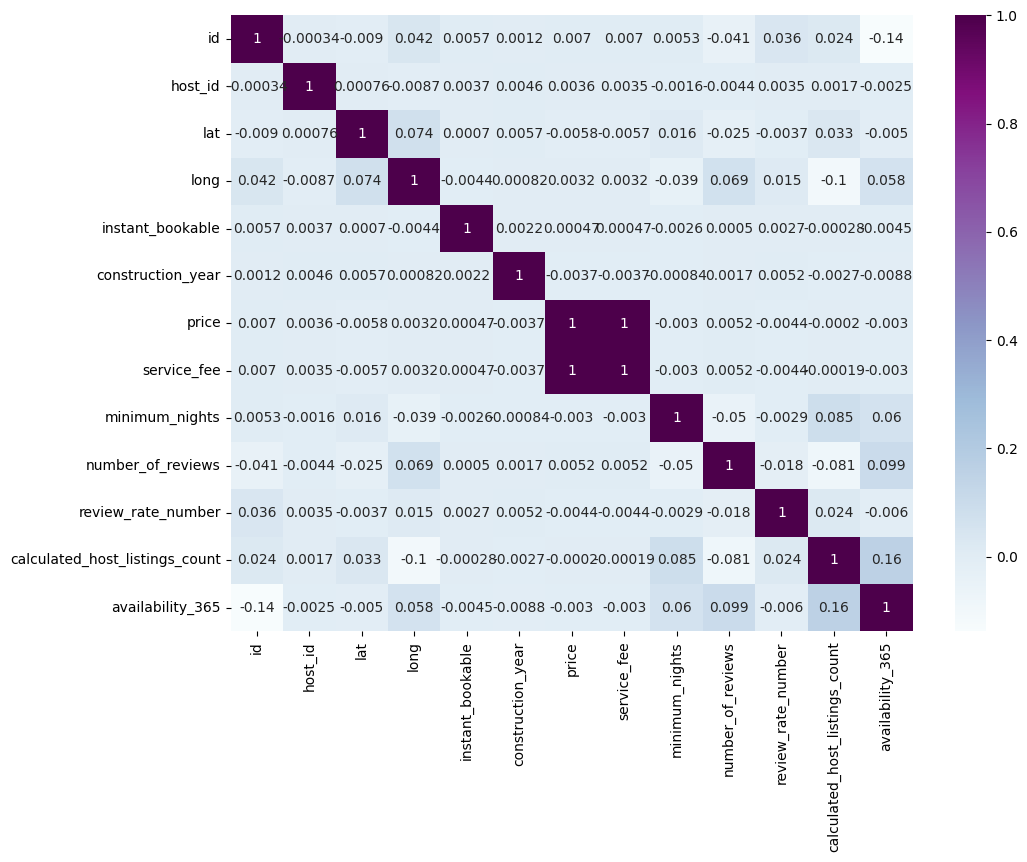

In [62]:
plt.figure(figsize=(11,8))
sns.heatmap(airbnb_df_corr, annot=True, cmap="BuPu")
plt.show

vedo che sono scorrelate le varibaili numeriche tra loro

vedo che price e service fee sono perfettamente correlate tra loro

SCATTER PLOT useful to visualize the relatioship between two continuous variables and I can use the Seaborn's scatterplot() function to create them.

per le vairbaili categoriche (object) posso usare scatterplots per studiare la distribuzione dele varibaili e osservarne la correlazione graficamente con quelle numeriche  piu interessanti

tipo construction year vs host id e vedere per lat, per long, neighoordo group e neighboorood, room type per vedere se ce una relazione tra ò host e l anno di costruzione con il neighoordoo o la tipologia di camere

guarda correlazione tra reveiws rate number e host_name

poi qualcosa tra price e service fee

per neighboorood group fai bar plot


Text(0.5, 1.0, 'Neighbourhood_group locations ')

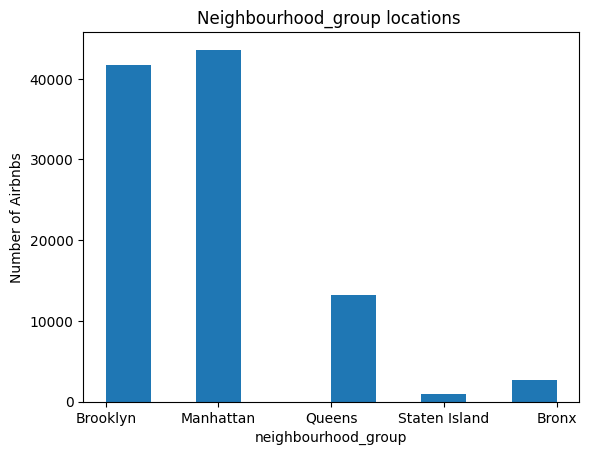

In [63]:
plt.hist(airbnb_df['neighbourhood_group'])
plt.xlabel('neighbourhood_group')
plt.ylabel('Number of Airbnbs')
plt.title('Neighbourhood_group locations ')


cerca correlazione tra neighboorod e price o con plot o con scatter e anche tra review_rate e price per vedere se all aumentare del numero di rece cambia wualcosa nel prezzo

In [64]:
#sns.pairplot(airbnb_df)

In [65]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102113 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102113 non-null  int64  
 1   name                            102113 non-null  object 
 2   host_id                         102113 non-null  int64  
 3   host_identity_verified          102113 non-null  object 
 4   host_name                       102113 non-null  object 
 5   neighbourhood_group             102113 non-null  object 
 6   neighbourhood                   102113 non-null  object 
 7   lat                             102113 non-null  float64
 8   long                            102113 non-null  float64
 9   country                         102113 non-null  object 
 10  country_code                    102113 non-null  object 
 11  instant_bookable                102113 non-null  bool   
 12  cancellation_policy  

ELIMINA TUTTI QUESTI SCATTER PLOT--> li uso ora per vedere velocemente le relazioni

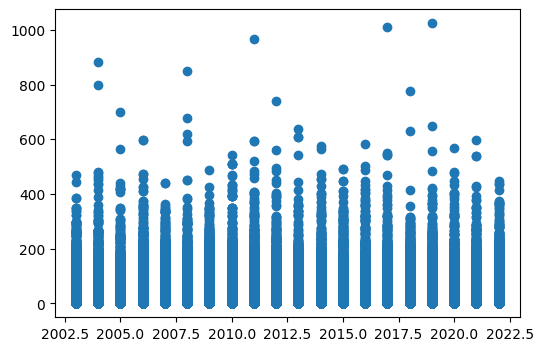

In [66]:
plt.figure(figsize=(6,4))
plt.scatter(airbnb_df["construction_year"], airbnb_df["number_of_reviews"])

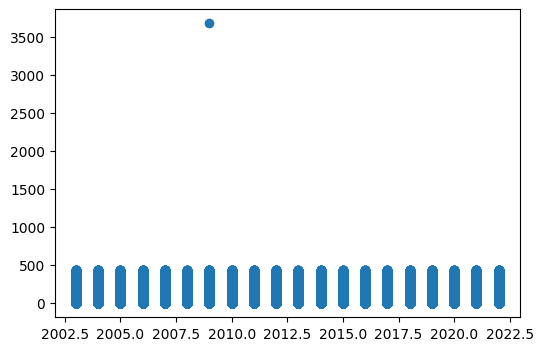

In [67]:
plt.figure(figsize=(6,4))
plt.scatter(airbnb_df["construction_year"], airbnb_df["availability_365"])

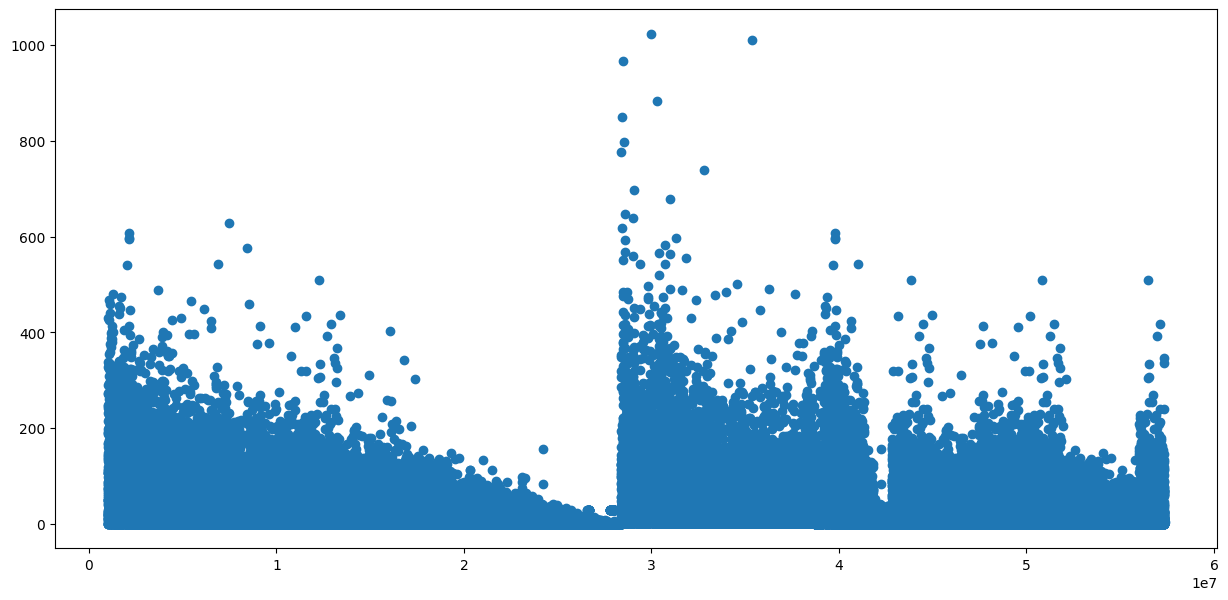

In [68]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["id"], airbnb_df["number_of_reviews"])

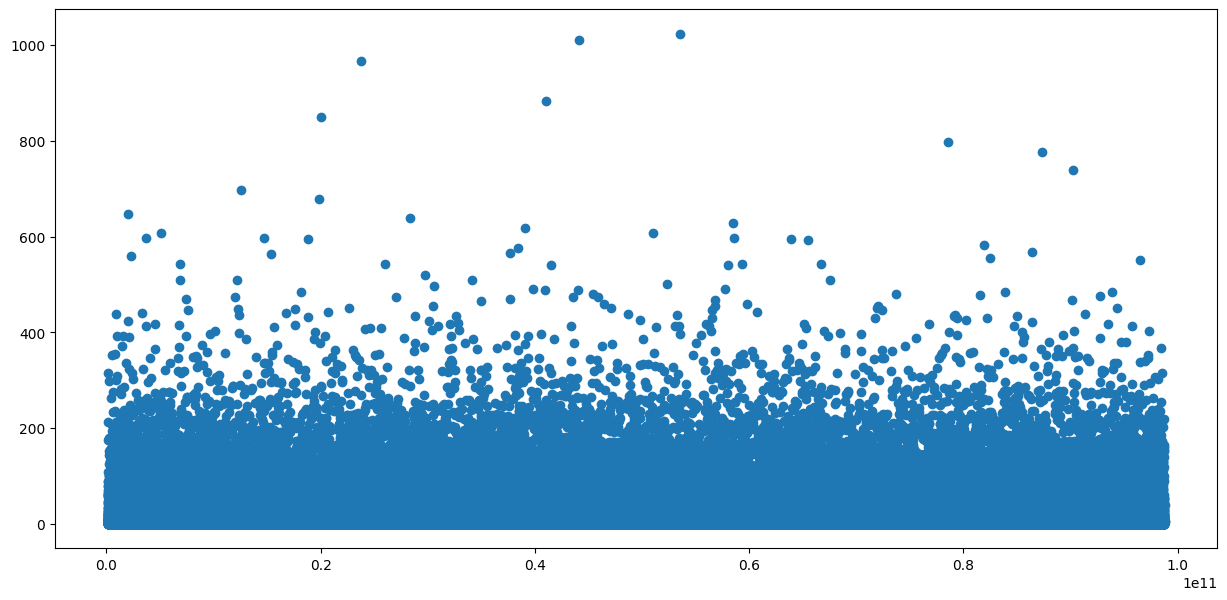

In [69]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["host_id"], airbnb_df["number_of_reviews"])

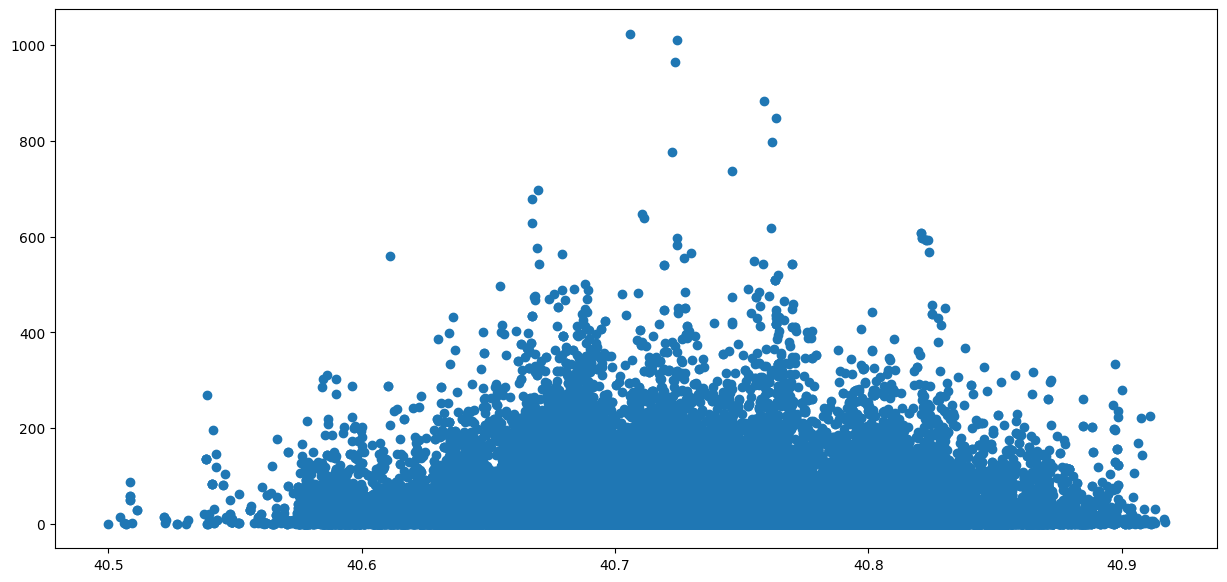

In [70]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["lat"], airbnb_df["number_of_reviews"])

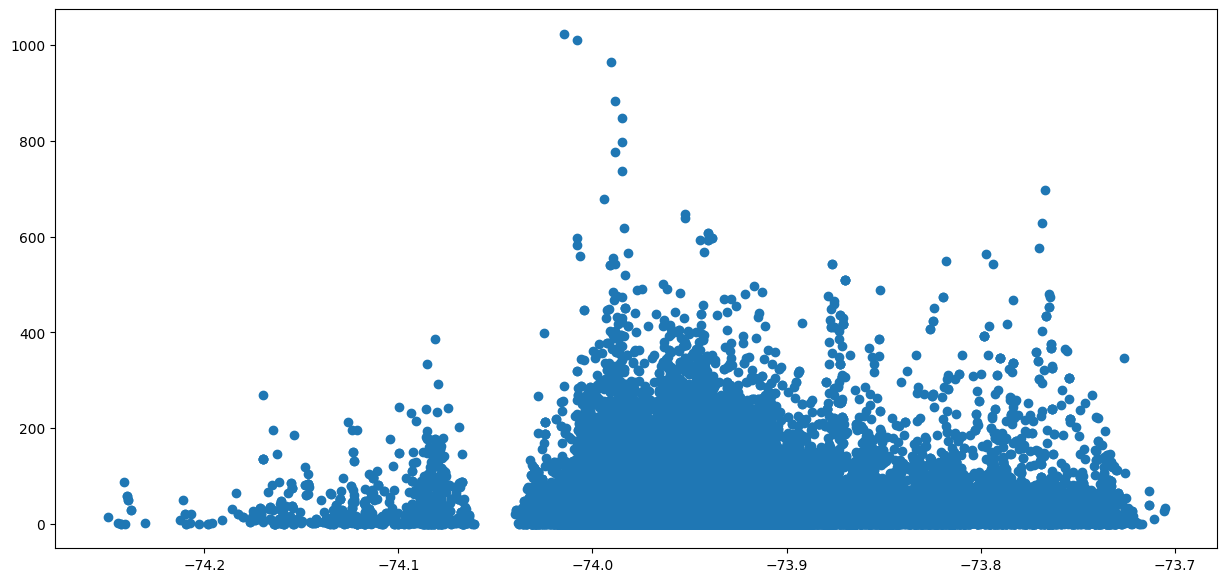

In [71]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["long"], airbnb_df["number_of_reviews"])

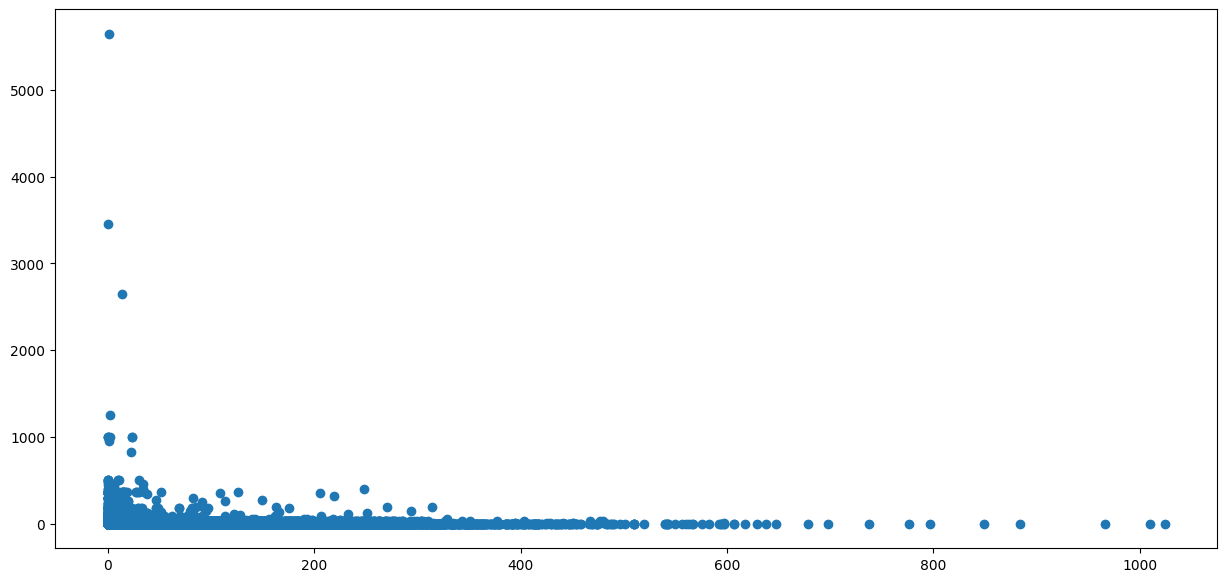

In [72]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["number_of_reviews"], airbnb_df["minimum_nights"])

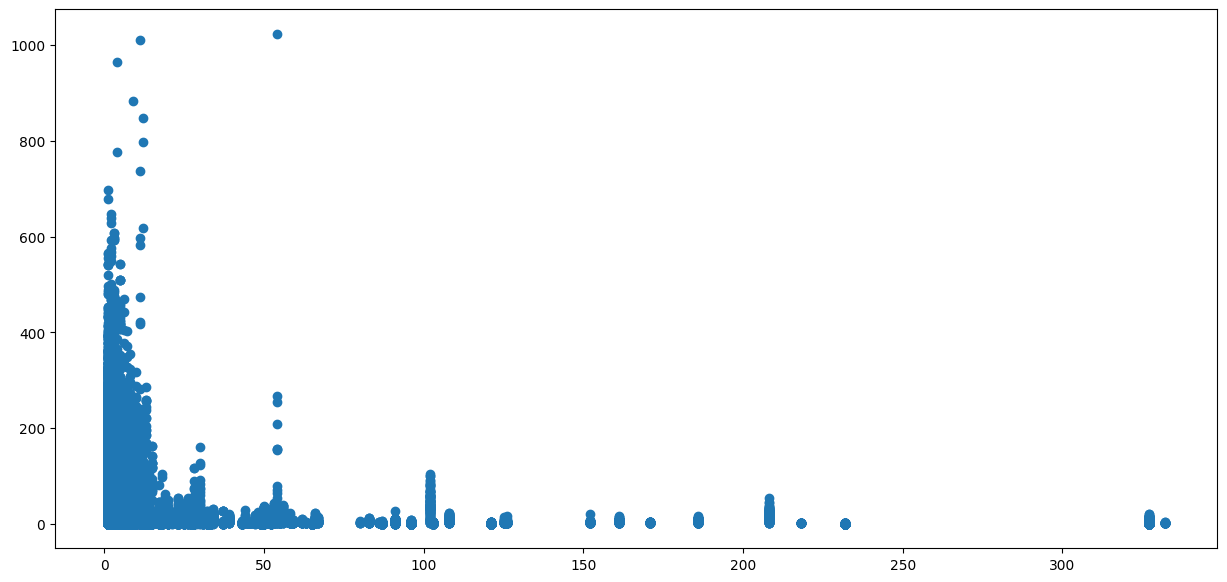

In [73]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["calculated_host_listings_count"], airbnb_df["number_of_reviews"])

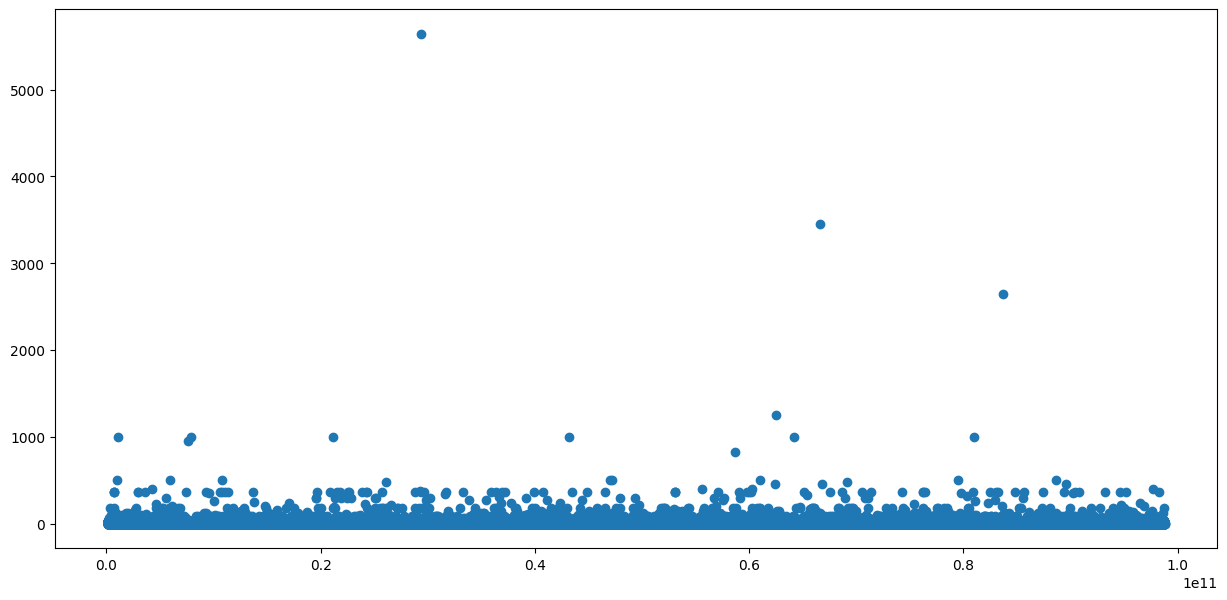

In [74]:
plt.figure(figsize=(15,7))
plt.scatter(airbnb_df["host_id"], airbnb_df["minimum_nights"])

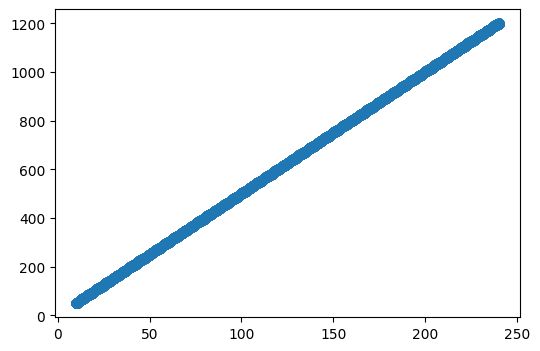

In [75]:
plt.figure(figsize=(6,4))
plt.scatter(airbnb_df["service_fee"], airbnb_df["price"])

they're perfectly correlated so if the price of the airbnb increases, also the service_fee increases.

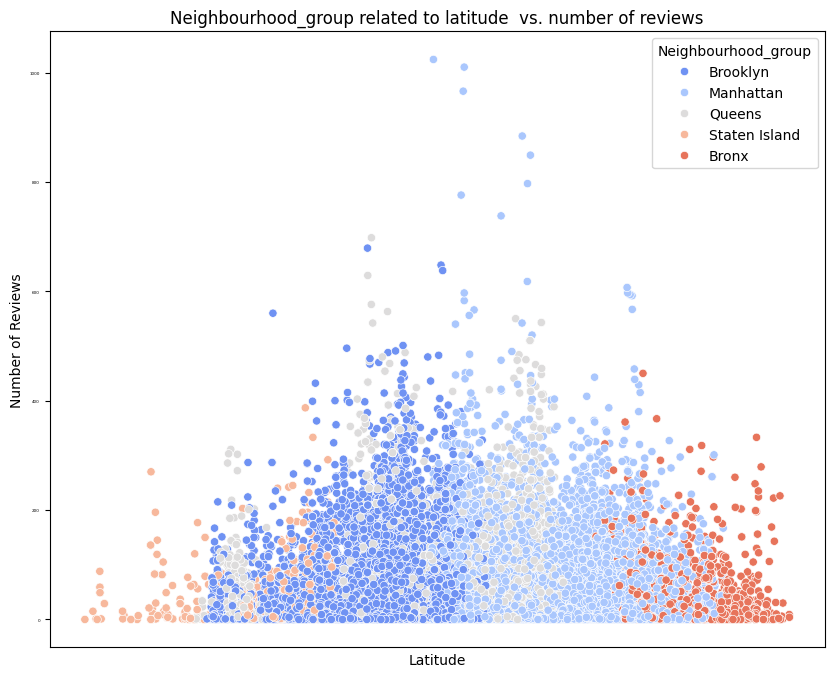

In [76]:
plt.figure(figsize=(10, 8))
plt.xlabel('Latitude')
plt.ylabel('Number of Reviews')
plt.title('Neighbourhood_group related to latitude  vs. number of reviews')
plt.xticks( fontsize=3)
plt.yticks( fontsize=3)
sns.scatterplot(data = airbnb_df, x = 'lat', y= 'number_of_reviews', hue='neighbourhood_group', palette='coolwarm')
plt.legend(title= 'Neighbourhood_group')
plt.xticks([])
plt.show()

vedo che la maggior parte degli appartamenti recensiti riguardano quelli di brooklyn e manhattan

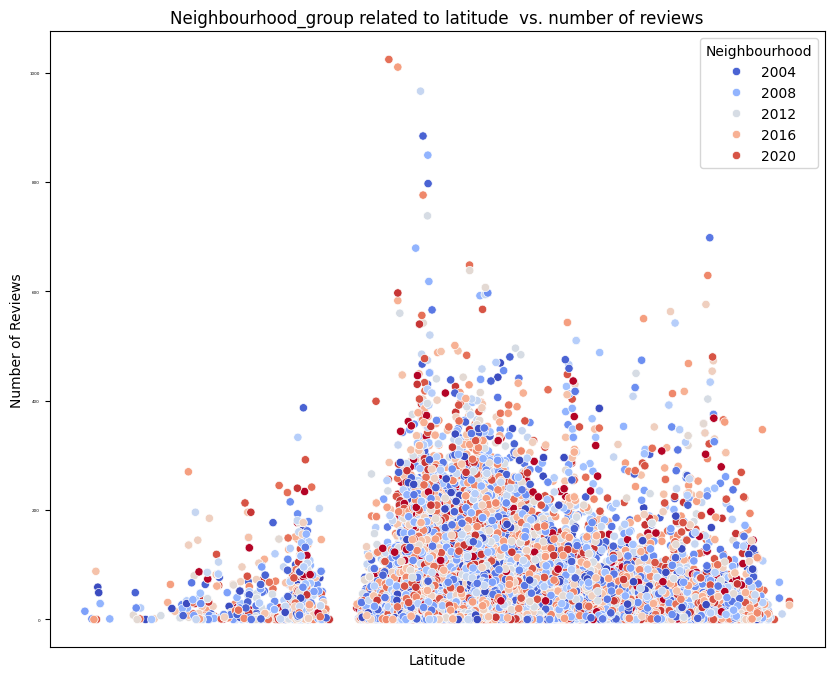

In [77]:
plt.figure(figsize=(10, 8))
plt.xlabel('Latitude')
plt.ylabel('Number of Reviews')
plt.title('Neighbourhood_group related to latitude  vs. number of reviews')
plt.xticks( fontsize=3)
plt.yticks( fontsize=3)
sns.scatterplot(data = airbnb_df, x = 'long', y= 'number_of_reviews', hue='construction_year', palette='coolwarm')
plt.legend(title= 'Neighbourhood')
plt.xticks([])
plt.show()

In [78]:
airbnb_df.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,1001254,1002102,1002403,1002755,1003689,1004098,1004650,1005202,1005754,1006307,1006859,1007411,1007964,1008516,1009068
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Home away from home,Entire Apt: Spacious Studio/Loft by central park,Large Cozy 1 BR Apartment In Midtown East,BlissArtsSpace!,BlissArtsSpace!,Large Furnished Room Near B'way,Cozy Clean Guest Room - Family Apt,Cute & Cozy Lower East Side 1 bdrm,Beautiful 1br on Upper West Side,Central Manhattan/near Broadway,"Lovely Room 1, Garden, Best Area, Legal rental",Wonderful Guest Bedroom in Manhattan for SINGLES
host_id,80014485718,52335172823,78829239556,85098326012,92037596077,45498551794,61300605564,90821839709,79384379533,75527839483,1280143094,18824631834,88136055909,26802410424,88920244552
host_identity_verified,unconfirmed,verified,unconfirmed,unconfirmed,verified,verified,unconfirmed,unconfirmed,verified,unconfirmed,verified,verified,verified,verified,verified
host_name,Madaline,Jenna,Elise,Garry,Lyndon,Michelle,Alberta,Emma,Evelyn,Carl,Miranda,Alan,Michael,Darcy,Leonardo
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan,Manhattan,Brooklyn,Brooklyn,Manhattan,Manhattan,Manhattan,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem,Murray Hill,Bedford-Stuyvesant,Bedford-Stuyvesant,Hell's Kitchen,Upper West Side,Chinatown,Upper West Side,Hell's Kitchen,South Slope,Upper West Side
lat,40.64749,40.75362,40.80902,40.68514,40.79851,40.74767,40.68688,40.68688,40.76489,40.80178,40.71344,40.80316,40.76076,40.66829,40.79826
long,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399,-73.975,-73.95596,-73.95596,-73.98493,-73.96723,-73.99037,-73.96545,-73.98867,-73.98779,-73.96113
country,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States,United States


voglio far diventare price e service fee dei float quindi voglio togliere $ e mettere ' '

In [79]:
airbnb_df.price

0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102113, dtype: float64

In [80]:
#dopo aver trasformato in float service fee e price posso vedere l'impatto del prezzo del servizio sul prezzo della camera di riferimento
#plt.scatter(airbnb_df['service_fee'], airbnb_df['price'])
#plt.show()

10 neighbourood con più airbnbs:

In [81]:
neighbourhood_by_most_Airbnbs = airbnb_df.neighbourhood.value_counts()
top_10_neighbourhood = neighbourhood_by_most_Airbnbs.head(10)
top_10_neighbourhood

neighbourhood
Bedford-Stuyvesant    7914
Williamsburg          7740
Harlem                5442
Bushwick              4953
Hell's Kitchen        3955
Upper West Side       3847
Upper East Side       3661
East Village          3467
Midtown               3372
Crown Heights         3244
Name: count, dtype: int64

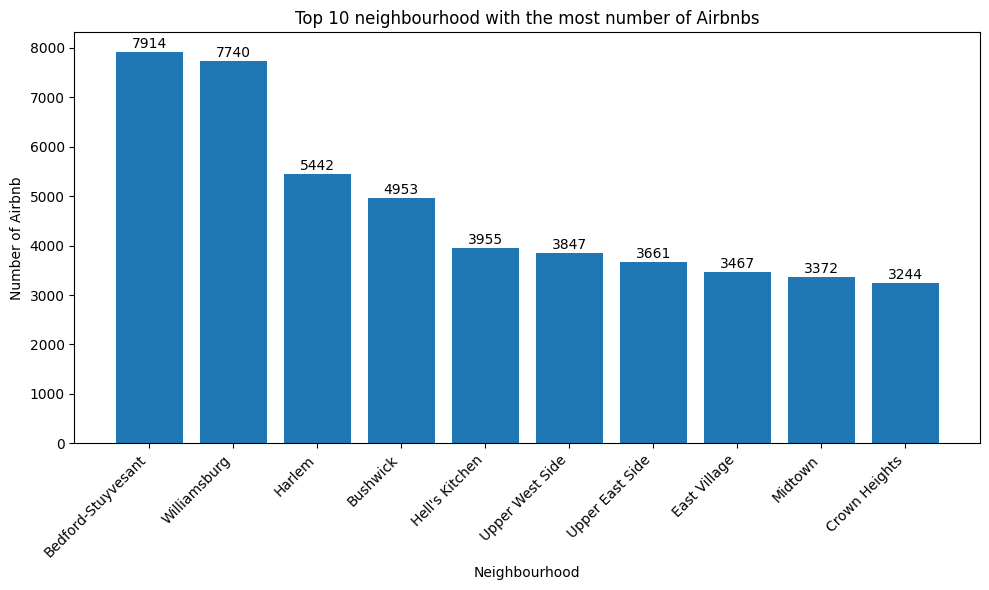

In [82]:

plt.figure(figsize=(10,6))
x = top_10_neighbourhood.index # Nomi degli assi dei quartieri
y = top_10_neighbourhood # Numero di quartieri
plt.title('Top 10 neighbourhood with the most number of Airbnbs')
plt.bar(x, y)
plt.xticks(rotation=45, ha='right') #with 'right' I'm sure that the xticks are under the corresponding bar
plt.ylabel('Number of Airbnb')
plt.xlabel('Neighbourhood')
for i, v in enumerate(y):#i index of y, v is the number of airbnbs in the neighbourhood of index i
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.show()


I want to check the room type  più ricorrente negli anni:per vedere se negli ultimi anni la maggior parte degli airbnb sono Entire home/apt, Private room , Shared room, Hotel room

In [83]:
airbnb_df.room_type.value_counts()

room_type
Entire home/apt    53454
Private room       46330
Shared room         2215
Hotel room           114
Name: count, dtype: int64

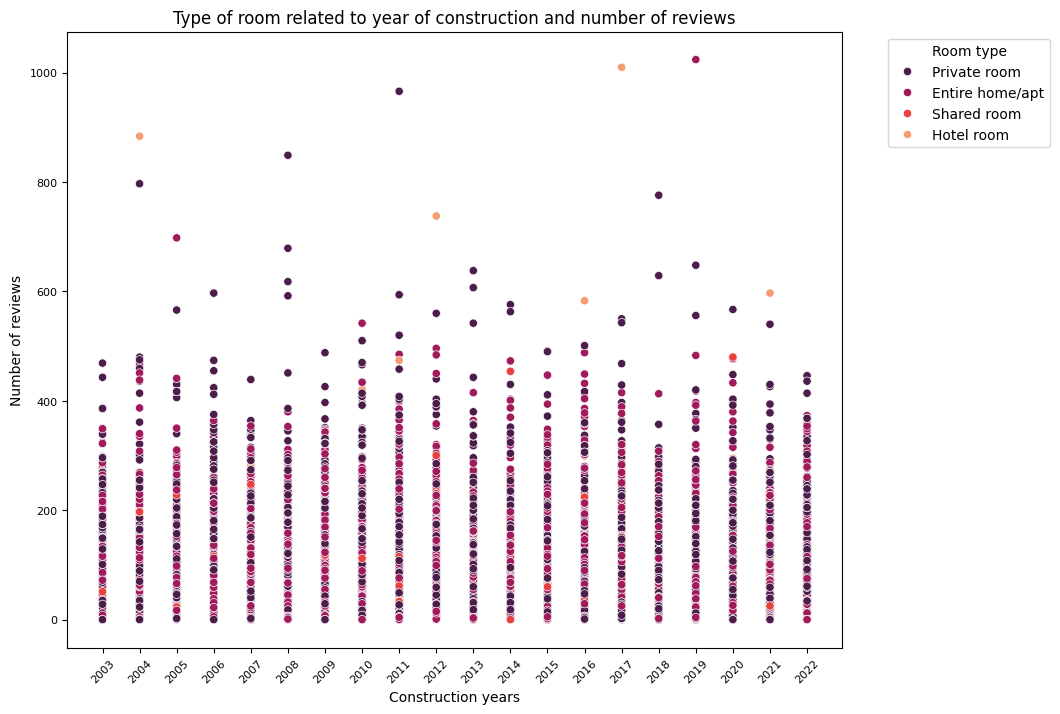

In [84]:
plt.figure(figsize=(10, 8))
plt.xlabel('Construction years')
plt.ylabel('Number of reviews')
plt.title('Type of room related to year of construction and number of reviews')
plt.xticks(rotation=45)  

# Interval of years and x-axis labels
years = range(airbnb_df['construction_year'].min(), airbnb_df['construction_year'].max() + 1)
plt.xticks(ticks=years, labels=years, fontsize=8)

plt.yticks(rotation=0, fontsize=8)
sns.scatterplot(data=airbnb_df, x='construction_year', y='number_of_reviews', hue='room_type', palette='rocket')
plt.legend(title='Room type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


la maggiorn parte degli airbnbs costruti dal 2003 al 2022 sono private room e entire home/apartament

now i want to know which is the year dove sono stat costruiti più aribnbs:

In [85]:
years=airbnb_df.construction_year.value_counts()
years

construction_year
2012    5309
2014    5213
2008    5200
2006    5196
2019    5174
2009    5144
2020    5136
2010    5135
2005    5116
2022    5112
2003    5097
2007    5086
2015    5074
2017    5042
2011    5041
2018    5030
2021    5015
2004    5010
2013    4993
2016    4990
Name: count, dtype: int64

years vanno da 2003 a 2022 e il maggior numero di airbnbs è stato costruito nel 2012, come si può vedere anche in:

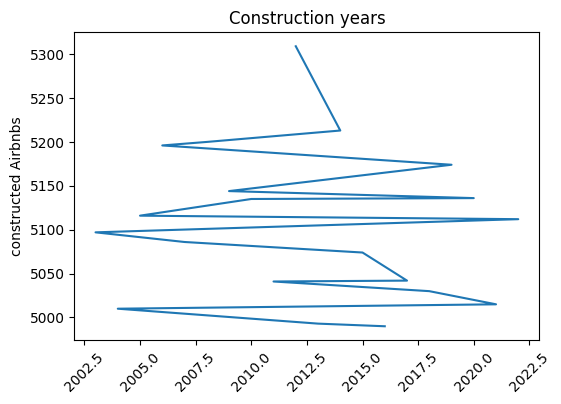

In [86]:
plt.figure(figsize=(6,4))
x=years.index
y=years
plt.plot(x,y)
plt.title('Construction years')
plt.xticks(rotation=45)
plt.ylabel('constructed Airbnbs')
plt.show()


Voglio sapere di che anno è l'airbnb più  ostoso e di che anno + quello più economico--> raggruppo i dati per anno di costruzione e per ognuno trovo il price max

In [87]:
max_price_per_year= airbnb_df.groupby('construction_year')['price'].max()
max_price_per_year

construction_year
2003    1200.0
2004    1199.0
2005    1200.0
2006    1199.0
2007    1200.0
2008    1200.0
2009    1200.0
2010    1200.0
2011    1200.0
2012    1200.0
2013    1200.0
2014    1200.0
2015    1200.0
2016    1200.0
2017    1200.0
2018    1200.0
2019    1200.0
2020    1200.0
2021    1200.0
2022    1200.0
Name: price, dtype: float64

il prezzo massimo giornaliero di un airbnb costruito nel 2004 e nel 2006 è di 1199 dollari, mentre per quelli costruiti negli altri anni è di 1200 dollari

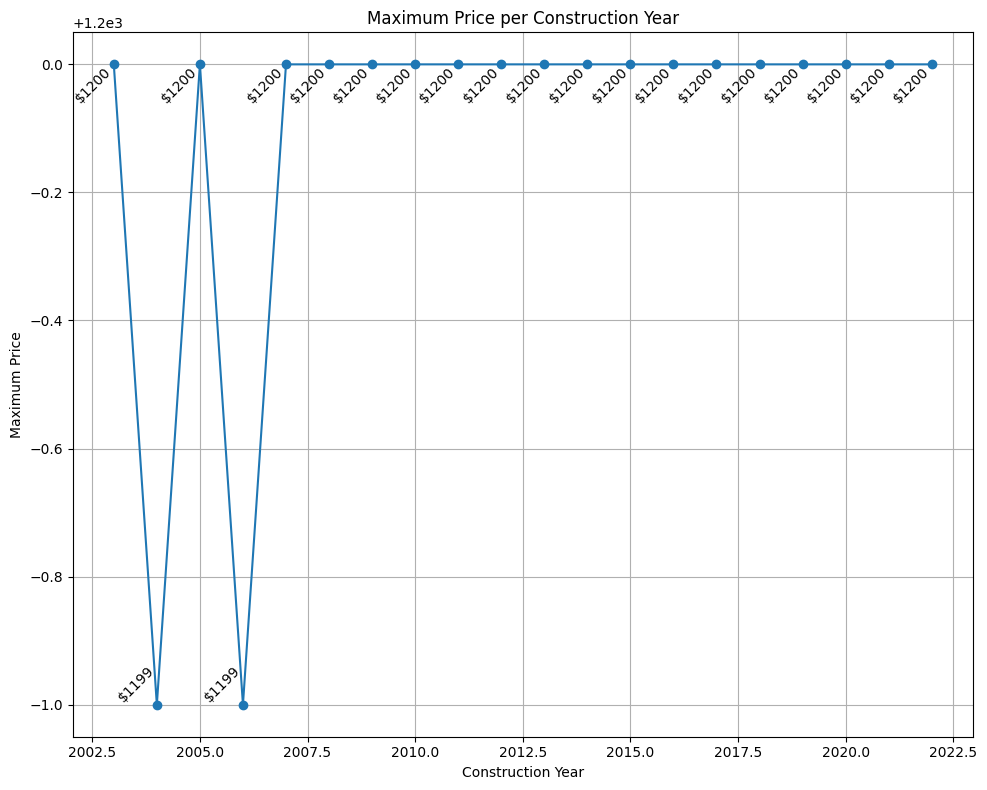

In [88]:
# Grafico del prezzo massimo per anno di costruzione
max_price_per_year.plot(kind='line', figsize=(10, 8), marker='o')
plt.xlabel('Construction Year')
plt.ylabel('Maximum Price')
plt.title('Maximum Price per Construction Year')
plt.grid(True)

# Aggiungi le etichette dei prezzi ai marker
for year, price in max_price_per_year.items():
    # Posiziona le etichette sopra i marker per i prezzi maggiori di una certa soglia
    if price > 1199:
        plt.text(year, price, f'${price:.0f}', rotation=45, ha='right', va='top')
    # Posiziona le etichette sotto i marker per gli altri prezzi
    else:
        plt.text(year, price, f'${price:.0f}', rotation=45, ha='right', va='bottom')

plt.tight_layout() 
plt.show()


In [89]:
min_price_per_year= airbnb_df.groupby('construction_year')['price'].min()
min_price_per_year

construction_year
2003    50.0
2004    50.0
2005    50.0
2006    50.0
2007    50.0
2008    50.0
2009    50.0
2010    50.0
2011    50.0
2012    50.0
2013    50.0
2014    50.0
2015    50.0
2016    50.0
2017    50.0
2018    50.0
2019    50.0
2020    50.0
2021    50.0
2022    50.0
Name: price, dtype: float64

il prezzo minimo giornaliero di ogni appartamento costruito è di 50 dollari, indifferentemente dall'anno di costruzione

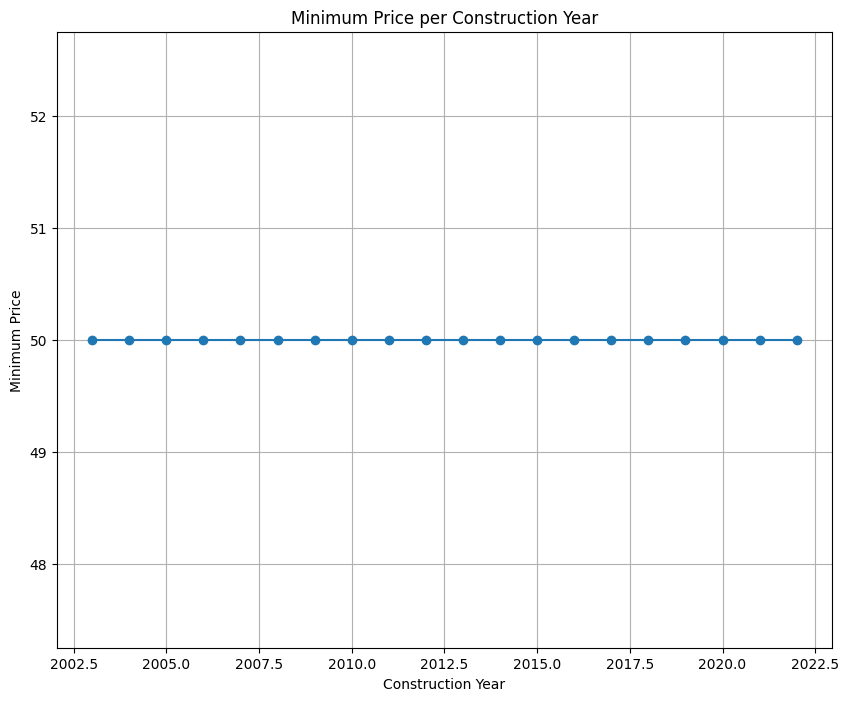

In [90]:
# Grafico del prezzo massimo per anno di costruzione
min_price_per_year.plot(kind='line', figsize=(10, 8), marker='o')
plt.xlabel('Construction Year')
plt.ylabel('Minimum Price')
plt.title('Minimum Price per Construction Year')
plt.grid(True)
plt.show()

potrei mettere quei due graifci in un subplot per vedere insieme

Ora calcolo il prezzo più alto per neighbourhood e poi quello più basso e quale neighoorhood ha il prezzo piu alto

In [91]:
airbnb_df.groupby('neighbourhood')['price'].max()

neighbourhood
Allerton           1195.0
Arden Heights      1136.0
Arrochar           1196.0
Arverne            1197.0
Astoria            1200.0
                    ...  
Windsor Terrace    1194.0
Woodhaven          1199.0
Woodlawn           1121.0
Woodrow            1025.0
Woodside           1200.0
Name: price, Length: 224, dtype: float64

In [92]:
# Trova il numero totale di quartieri nel DataFrame
total_neighborhoods = airbnb_df['neighbourhood'].nunique()

# Trova il prezzo massimo per ciascun quartiere
max_price_per_neighborhood = airbnb_df.groupby('neighbourhood')['price'].max()

# Trova il prezzo massimo in generale
max_price = max_price_per_neighborhood.max()

# Trova i quartieri in cui si ha il prezzo massimo
most_expensive_neighborhoods = max_price_per_neighborhood[max_price_per_neighborhood == max_price].index.tolist()

# Stampa i quartieri con il prezzo massimo e il relativo prezzo massimo
print("I quartieri con il prezzo massimo sono:")
for neighborhood in most_expensive_neighborhoods:
    print(neighborhood)
print("Prezzo massimo:", max_price)

# Stampa il numero totale di quartieri nel DataFrame
print("Numero totale di quartieri nel DataFrame:", total_neighborhoods)

# Stampa il numero di quartieri con il prezzo massimo
num_most_expensive_neighborhoods = len(most_expensive_neighborhoods)
print("Numero di quartieri con il prezzo massimo:", num_most_expensive_neighborhoods)


I quartieri con il prezzo massimo sono:
Astoria
Bedford-Stuyvesant
Belmont
Boerum Hill
Bushwick
Chelsea
City Island
Crown Heights
Ditmars Steinway
East Flatbush
East New York
East Village
Elmhurst
Financial District
Flushing
Gramercy
Greenpoint
Greenwich Village
Harlem
Hell's Kitchen
Hunts Point
Midwood
Park Slope
Prospect-Lefferts Gardens
Ridgewood
Shore Acres
Washington Heights
West Village
Williamsburg
Woodside
Prezzo massimo: 1200.0
Numero totale di quartieri nel DataFrame: 224
Numero di quartieri con il prezzo massimo: 30


uso il metodo .agg()  trovato qui: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html per aggregare secondo long e lat

In [93]:
# Trova la latitudine e la longitudine di ogni quartiere
neighborhood_coordinates = airbnb_df.groupby('neighbourhood').agg({'lat': 'mean', 'long': 'mean'})

# Trova il prezzo massimo per ciascun quartiere
max_price_per_neighborhood = airbnb_df.groupby('neighbourhood')['price'].max()

# Trova il prezzo massimo in generale
max_price = max_price_per_neighborhood.max()

# Trova i quartieri in cui si ha il prezzo massimo
most_expensive_neighborhoods = max_price_per_neighborhood[max_price_per_neighborhood == max_price].index.tolist()

# Stampa i quartieri con il prezzo massimo, il relativo prezzo massimo, la latitudine e la longitudine
print("I quartieri con il prezzo massimo sono:")
for neighborhood in most_expensive_neighborhoods:
    lat = neighborhood_coordinates.loc[neighborhood, 'lat']
    long = neighborhood_coordinates.loc[neighborhood, 'long']
    print(f"Quartiere: {neighborhood}, \t\t\tLatitudine: {lat}, Longitudine: {long}")

# Stampa il numero totale di quartieri nel DataFrame
total_neighborhoods = airbnb_df['neighbourhood'].nunique()
print("Numero totale di quartieri nel DataFrame:", total_neighborhoods)
print(f'Prezzo massimo: {max_price}')

# Stampa il numero di quartieri con il prezzo massimo
num_most_expensive_neighborhoods = len(most_expensive_neighborhoods)
print("Numero di quartieri con il prezzo massimo:", num_most_expensive_neighborhoods)


I quartieri con il prezzo massimo sono:
Quartiere: Astoria, 			Latitudine: 40.76438361546867, Longitudine: -73.92027622745046
Quartiere: Bedford-Stuyvesant, 			Latitudine: 40.68724061017817, Longitudine: -73.93956036663255
Quartiere: Belmont, 			Latitudine: 40.854824471363635, Longitudine: -73.887575805
Quartiere: Boerum Hill, 			Latitudine: 40.68639942415731, Longitudine: -73.9853891011236
Quartiere: Bushwick, 			Latitudine: 40.696422124853626, Longitudine: -73.9201815525843
Quartiere: Chelsea, 			Latitudine: 40.74491212493181, Longitudine: -73.99784252591289
Quartiere: City Island, 			Latitudine: 40.84807195121952, Longitudine: -73.78705268292683
Quartiere: Crown Heights, 			Latitudine: 40.67276378046251, Longitudine: -73.94548116302585
Quartiere: Ditmars Steinway, 			Latitudine: 40.77490740036496, Longitudine: -73.91083507566422
Quartiere: East Flatbush, 			Latitudine: 40.648745106979256, Longitudine: -73.93907689097925
Quartiere: East New York, 			Latitudine: 40.66823119323384, Lon

ora potrei calcolare quelli con i prezzi più bassi e mettere una cartina con un pallino verde ad esempio per quelli con prezzi minori e rosso maggiori

In [94]:
# Trova il numero totale di quartieri nel DataFrame
total_neighborhoods = airbnb_df['neighbourhood'].nunique()

# Trova il prezzo minimo per ciascun quartiere
min_price_per_neighborhood = airbnb_df.groupby('neighbourhood')['price'].min()

# Trova il prezzo minimo in generale
min_price = min_price_per_neighborhood.min()

# Trova i quartieri in cui si ha il prezzo minimo
less_expensive_neighborhoods = min_price_per_neighborhood[min_price_per_neighborhood == min_price].index.tolist()

# Stampa i quartieri con il prezzo minimo e il relativo prezzo minimo
print("I quartieri con il prezzo minimo sono:")
for neighborhood in less_expensive_neighborhoods:
    print(neighborhood)
print("Prezzo minimo:", min_price)

# Stampa il numero totale di quartieri nel DataFrame
print("Numero totale di quartieri nel DataFrame:", total_neighborhoods)

# Stampa il numero di quartieri con il prezzo minimo
num_less_expensive_neighborhoods = len(less_expensive_neighborhoods)
print("Numero di quartieri con il prezzo minimo:", num_less_expensive_neighborhoods)

I quartieri con il prezzo minimo sono:
Astoria
Bedford-Stuyvesant
Borough Park
Bushwick
Canarsie
Crown Heights
Cypress Hills
Ditmars Steinway
East Elmhurst
East Harlem
East Village
Financial District
Flatbush
Flushing
Fort Hamilton
Greenwich Village
Harlem
Hell's Kitchen
Jamaica
Kingsbridge
Long Island City
Lower East Side
Maspeth
Midwood
Mill Basin
Mott Haven
Murray Hill
New Dorp Beach
Oakwood
Ozone Park
Port Richmond
Prospect-Lefferts Gardens
SoHo
South Ozone Park
St. Albans
Sunnyside
Upper West Side
Washington Heights
Williamsburg
Prezzo minimo: 50.0
Numero totale di quartieri nel DataFrame: 224
Numero di quartieri con il prezzo minimo: 39


uso il metodo .agg()  trovato qui: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html per aggregare secondo long e lat

traduci

In [111]:
# Trova la latitudine e la longitudine di ogni quartiere
neighborhood_coordinates1 = airbnb_df.groupby('neighbourhood').agg({'lat': 'mean', 'long': 'mean'}) #aggrego i dati raggruppandoli in quartire e calcolando al media della latitudine e longitudine di ciascun quartire per ottenere un'unica coppia di coordinate per ciascun quartiere

# Trova il prezzo minimo per ciascun quartiere
min_price_per_neighborhood = airbnb_df.groupby('neighbourhood')['price'].min()

# Trova il prezzo minimo in generale
min_price = min_price_per_neighborhood.min()

# Trova i quartieri in cui si ha il prezzo minimo
less_expensive_neighborhoods = min_price_per_neighborhood[min_price_per_neighborhood == min_price].index.tolist()

# Stampa i quartieri con il prezzo minimo, il relativo prezzo minimo, la latitudine e la longitudine
print("I quartieri con il prezzo minimo sono:")
for neighborhood in less_expensive_neighborhoods:
    lat = neighborhood_coordinates1.loc[neighborhood, 'lat']
    long = neighborhood_coordinates1.loc[neighborhood, 'long']
    print(f"Neighbourhood: {neighborhood}, \t\t\tLatitude: {lat}, Longitude: {long}")

# Stampa il numero totale di quartieri nel DataFrame
total_neighborhoods = airbnb_df['neighbourhood'].nunique()
print("Numero totale di quartieri nel DataFrame:", total_neighborhoods)
print("Prezzo minimo:", min_price)

# Stampa il numero di quartieri con il prezzo minimo
num_less_expensive_neighborhoods = len(less_expensive_neighborhoods)
print("Numero di quartieri con il prezzo minimo:", num_less_expensive_neighborhoods)

I quartieri con il prezzo minimo sono:
Neighbourhood: Astoria, 			Latitude: 40.76438361546867, Longitude: -73.92027622745046
Neighbourhood: Bedford-Stuyvesant, 			Latitude: 40.68724061017817, Longitude: -73.93956036663255
Neighbourhood: Borough Park, 			Latitude: 40.63735557518797, Longitude: -73.99719103759398
Neighbourhood: Bushwick, 			Latitude: 40.696422124853626, Longitude: -73.9201815525843
Neighbourhood: Canarsie, 			Latitude: 40.63885512718204, Longitude: -73.90158159102245
Neighbourhood: Crown Heights, 			Latitude: 40.67276378046251, Longitude: -73.94548116302585
Neighbourhood: Cypress Hills, 			Latitude: 40.68225271934132, Longitude: -73.88367905859282
Neighbourhood: Ditmars Steinway, 			Latitude: 40.77490740036496, Longitude: -73.91083507566422
Neighbourhood: East Elmhurst, 			Latitude: 40.762931203078516, Longitude: -73.87795916605371
Neighbourhood: East Harlem, 			Latitude: 40.79633508073883, Longitude: -73.94225887286082
Neighbourhood: East Village, 			Latitude: 40.726747

uan volta visualizzate tutte le coordinate dei quartiri con il minor prezzo e con il maggior prezzo

# https://www.andreaprovino.it/folium-geospatial-data-python
https://youtu.be/SgacOaHoJLs?si=vJ5hJFD5QxGkGEyv

folium installata

inizio a creare la mappa

In [113]:
#creo basemap

map_nyc = folium.Map(location = [40.76438361546867, -73.92027622745046], zoom_start = 10)
# map_nyc = folium.Map(location = [40.76438361546867, -73.92027622745046], zoom_start = 8, tiles = "CartoDB Positron")

#aggiungo marker
#folium.Marker (location = [40.76438361546867, -73.92027622745046], popup = 'Astoria', tooltip = 'clicc per info', icon = folium.Icon(color = 'green', icon = 'house', prefix = 'fa')).add_to(map_nyc)

# Iterare su ciascun quartiere e creare un marker sulla mappa per ogni quartiere costoso
for neighborhood in most_expensive_neighborhoods:
    # Trovare la latitudine e la longitudine del quartiere
    lat = neighborhood_coordinates.loc[neighborhood, 'lat'] #neighborhood_coordinates l'ho definito nel codice sopra con groupy tra neighbourhood e .agg(lat e long medie)
    long = neighborhood_coordinates.loc[neighborhood, 'long']
    
    # Aggiungere un marker con il nome del quartiere
    folium.Marker([lat, long], popup=neighborhood, tooltip = 'price: $1200', icon = folium.Icon(color = 'red', icon = 'house', prefix = 'fa')).add_to(map_nyc)
# Iterare su ciascun quartiere e creare un marker sulla mappa per ogni quartiere meno costoso
for neighborhood in less_expensive_neighborhoods:
    # Trovare la latitudine e la longitudine del quartiere
    lat = neighborhood_coordinates1.loc[neighborhood, 'lat'] #neighborhood_coordinates l'ho definito nel codice sopra con groupy tra neighbourhood e .agg(lat e long medie)
    long = neighborhood_coordinates1.loc[neighborhood, 'long']
    
    # Aggiungere un marker con il nome del quartiere
    folium.Marker([lat, long], popup=neighborhood, tooltip = 'price: $50', icon = folium.Icon(color = 'green', icon = 'house', prefix = 'fa')).add_to(map_nyc)
map_nyc

i marker verdi indicano gli airbnbs meno cari e quelli rossi i più cari e il loro prezzo al giorno

In [97]:
# Creare una mappa centrata su New York City
map_nyc = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Iterare su ciascun quartiere e creare un marker sulla mappa per ogni quartiere

provo a vedere type of room in base al prezzo e neighbourhood

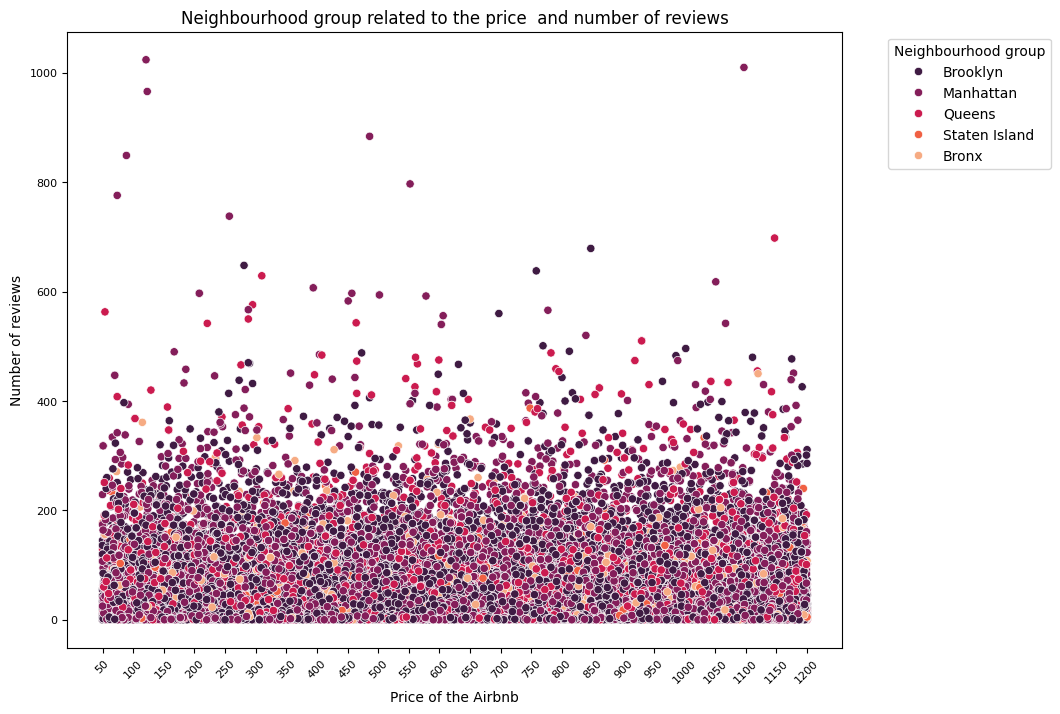

In [98]:
plt.figure(figsize=(10, 8))
plt.xlabel('Price of the Airbnb')
plt.ylabel('Number of reviews')
plt.title('Neighbourhood group related to the price  and number of reviews')
plt.xticks(rotation=45)

# Definisci l'intervallo dei prezzi e le etichette degli assi x
# Modifica gli intervalli e l'incremento a seconda dei tuoi dati
prezzi = range(int(airbnb_df['price'].min()), int(airbnb_df['price'].max()) + 1, 50)
plt.xticks(ticks=prezzi, labels=prezzi, fontsize=8)

plt.yticks(rotation=0, fontsize=8)
sns.scatterplot(data=airbnb_df, x='price', y='number_of_reviews', hue='neighbourhood_group', palette='rocket')
plt.legend(title='Neighbourhood group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Text(0, 0.5, '')

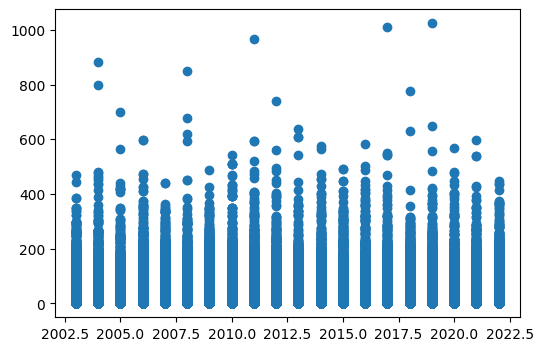

In [99]:
plt.figure(figsize=(6,4))#we have 4 features, we can plot max 3
plt.scatter(airbnb_df.construction_year, airbnb_df.number_of_reviews)#we scatter 2 features together, per ogni indice mi dice a che classe corrispondono le cose usano i colori
plt.xlabel('')
plt.ylabel('')

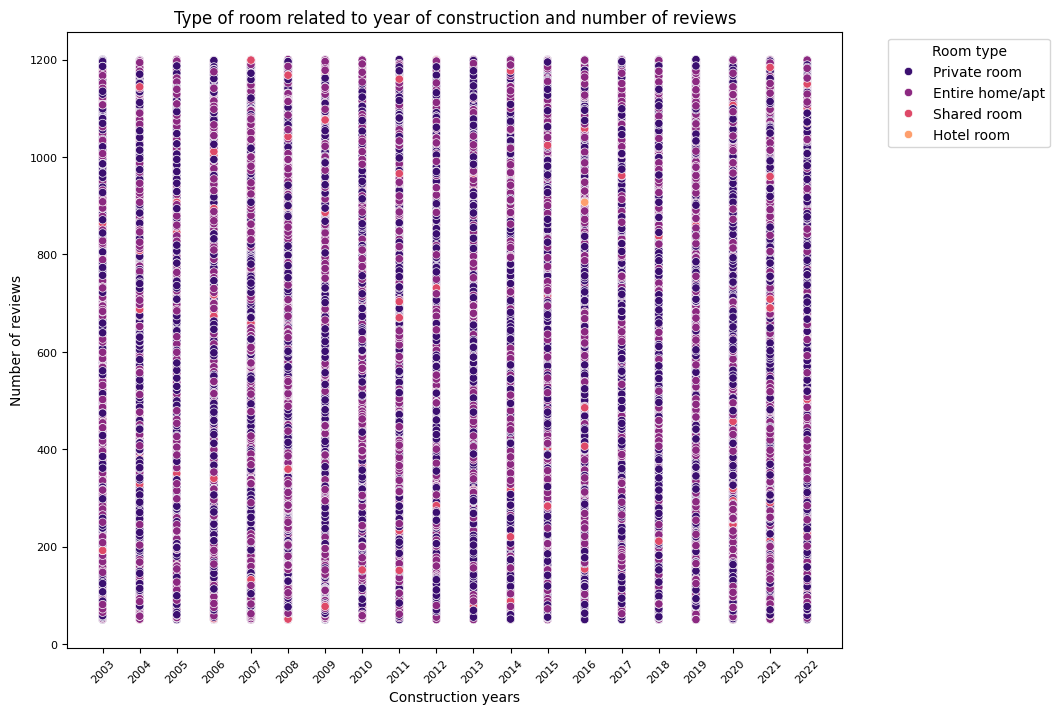

In [100]:
plt.figure(figsize=(10, 8))
plt.xlabel('Construction years')
plt.ylabel('Number of reviews')
plt.title('Type of room related to year of construction and number of reviews')
plt.xticks(rotation=45)  # Rotazione delle etichette sull'asse x per una migliore leggibilità

# Definisci l'intervallo degli anni e le etichette degli assi x
years = range(airbnb_df['construction_year'].min(), airbnb_df['construction_year'].max() + 1)
plt.xticks(ticks=years, labels=years, fontsize=8)

plt.yticks(rotation=0, fontsize=8)
sns.scatterplot(data=airbnb_df, x='construction_year', y='price', hue='room_type', palette='magma')
plt.legend(title='Room type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


vedo che nel quartire di Manhattan in cui sono presenti 43613 airbnbs si ha una distribuzione più uniforme dei listing lungo la latitudine rispetto agli altri quartieri

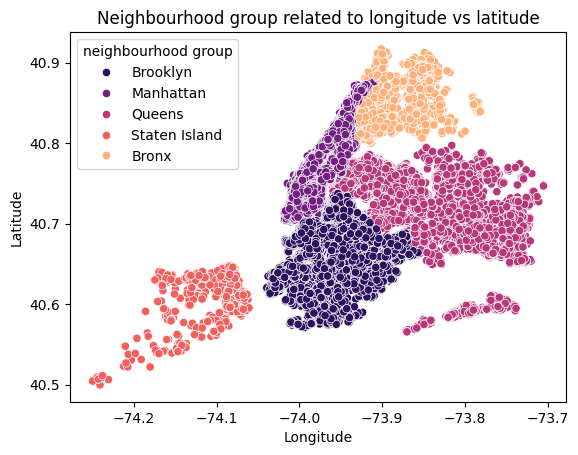

In [101]:
sns.scatterplot(x='long', y='lat', hue='neighbourhood_group',palette='magma', data=airbnb_df)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Neighbourhood group related to longitude vs latitude')
plt.legend(title='neighbourhood group')
plt.show()

in questi grafici (tienine solo uno) vedo che ci sono chiare differenza nella distribuzione dei ounti nello scatterplot tra i gruppi di quartiri, mostra che alcuni quartiri hanno una maggiore concentrazione di airbnb, come Manhattan Brooklyn, rispetto ad altri con minore concentrazione, perchè interessati da più parchi, zone verdi e meno attrazioni, come in Staten Island.

Osserva se c'è una relazione chiara tra la dimensione dei punti e il prezzo degli alloggi. Ad esempio, potresti scoprire che i punti più grandi sono effettivamente quelli con i prezzi più alti, confermando l'ipotesi iniziale

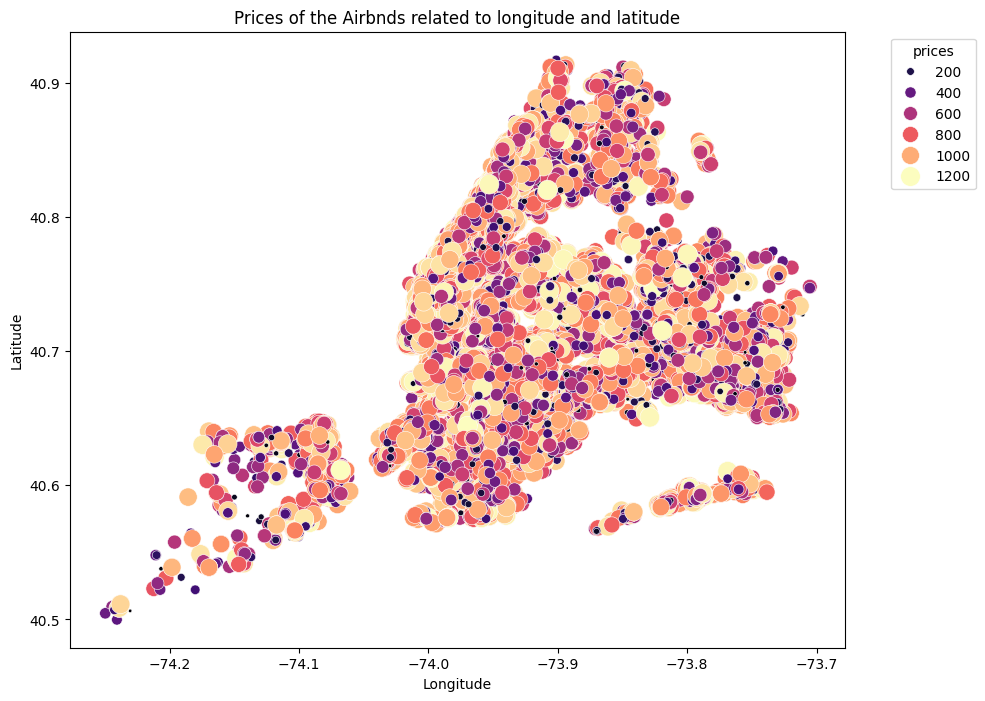

In [102]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', hue='price',  size='price', sizes=(5, 200), data=airbnb_df, palette='magma')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Prices of the Airbnds related to longitude and latitude')
plt.legend(title='prices', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

vedo che i prezzi giornalieri degli airbnbs sono equamente distributi sui vari neighboorhood_group

i punti corrispondenti ad alloggi più costosi sono rappresentati da punti più grandi

Find the neighbourhood that host the best rate reviews on average

In [103]:
average_review_rate = airbnb_df.groupby('neighbourhood')['review_rate_number'].mean()
average_review_rate

neighbourhood
Allerton           3.273741
Arden Heights      3.777778
Arrochar           3.476061
Arverne            3.228700
Astoria            3.226243
                     ...   
Windsor Terrace    3.107231
Woodhaven          3.321053
Woodlawn           3.310345
Woodrow            4.000000
Woodside           3.405810
Name: review_rate_number, Length: 224, dtype: float64

TRADUCI:

In [104]:
best_neighbourhood = average_review_rate.idxmax() #restituirà l'etichetta dell'indice (ovvero il nome del quartiere) che ha la media più alta dei tassi di recensione
best_review_rate = average_review_rate.max()
print("Il quartiere con il miglior tasso di recensioni in media è:", best_neighbourhood)
print("Il suo tasso di recensioni medio è:", best_review_rate)

Il quartiere con il miglior tasso di recensioni in media è: Glen Oaks
Il suo tasso di recensioni medio è: 4.5


mostro i 15 quartieri con il piu alto tasso di valutazione nelle recensioni, in media e utilizzo un grafico a barre orizzontali e vedo anche dal grafico quale è il quartire migliore e a quanto corrisponde il suo tasso

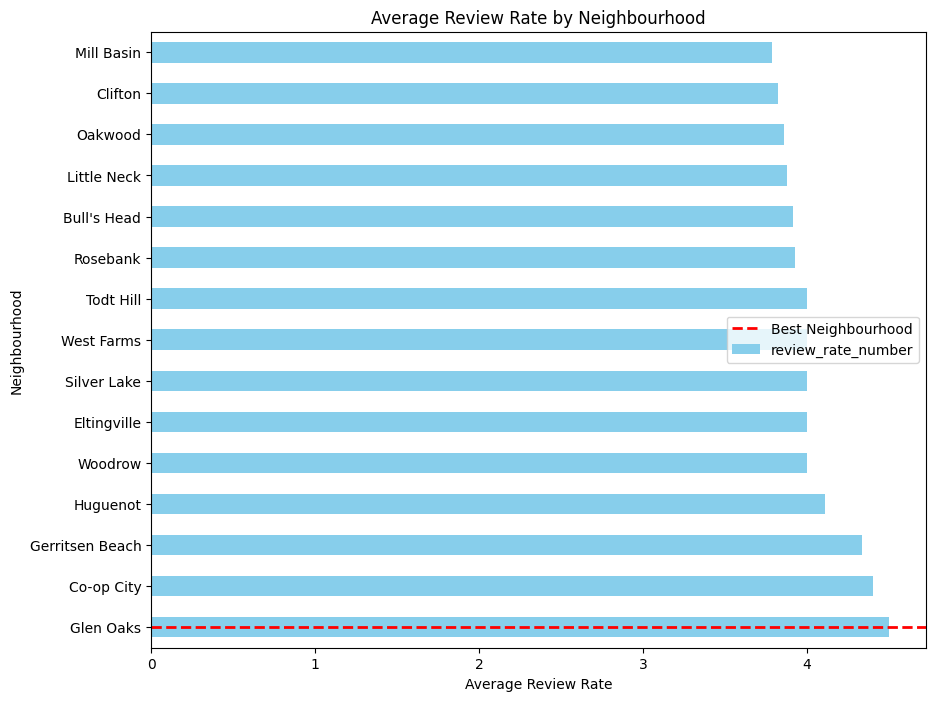

In [105]:
average_review_rate_sorted = average_review_rate.sort_values(ascending=False)
some_neighbourhood_average_review_rate = average_review_rate_sorted.head(15)
plt.figure(figsize=(10, 8))
some_neighbourhood_average_review_rate.plot(kind='barh', color='skyblue')
plt.xlabel('Average Review Rate')
plt.ylabel('Neighbourhood')
plt.title('Average Review Rate by Neighbourhood')
plt.axhline(y=best_neighbourhood, color='red', linestyle='--', linewidth=2, label='Best Neighbourhood')
plt.legend()
plt.show()

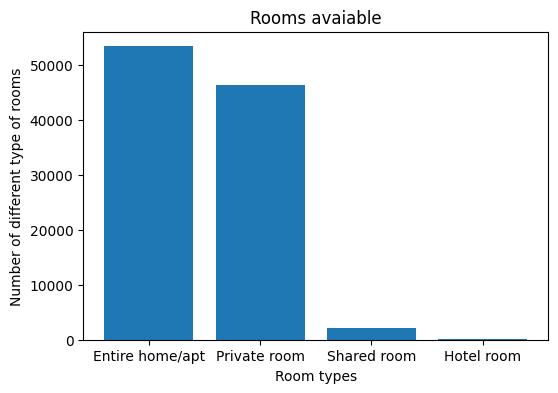

In [106]:
room_types = airbnb_df.room_type.value_counts()
plt.figure(figsize=(6,4))
x = room_types.index
y = room_types
plt.bar(x,y)
plt.xlabel('Room types')
plt.ylabel('Number of different type of rooms')
plt.title('Rooms avaiable')
plt.show()

i can see that la maggior parte degli airbnbs disponibili sul territorio di new york sono entire home/appartamenti, questo indica che sono la soluzione più ricercata ad esempio dai turisti

relazione tra prezzo e tipologia di camera: utilizzo il boxplot https://seaborn.pydata.org/generated/seaborn.boxplot.html

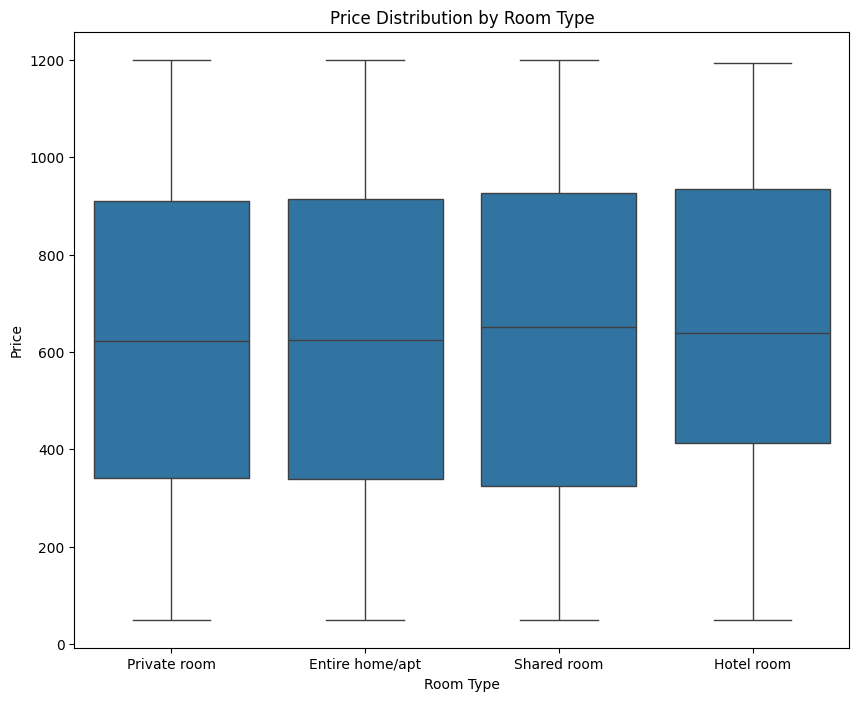

In [107]:
# Grafico a boxplot dei prezzi in base al tipo di camera
plt.figure(figsize=(10, 8))
sns.boxplot(x='room_type', y='price', data=airbnb_df)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution by Room Type')
plt.show()

la mediana  è simile per le diverse tipologie di stanza quidni i prezzi medi delle diverse room_types sono simili. Osservo che l'estremo inferiore del boxplot relativo a hotel room è più alto rispetto a quelli delle altre stipologie di stanze, questo potrebbe significare che per hotel room sono presenti dati con prezzi più alti, ma non eccessivmanete da essere considerati outliers. si aha quindi una maggiore varietà di prezzi all'interno di quella tipologia di stanza ma senza una differenza significativa nella mediana.
voglio esaminare meglio i prezzi dell'hotel room per comprendere al meglio al distribuzione dei prezzi di tali airbnbs.

per divsualizzre la distribuzione dei prezzi per l'hotel room rispetto aglia tlri tipi di room utilizzo il violin plot: https://seaborn.pydata.org/generated/seaborn.violinplot.html

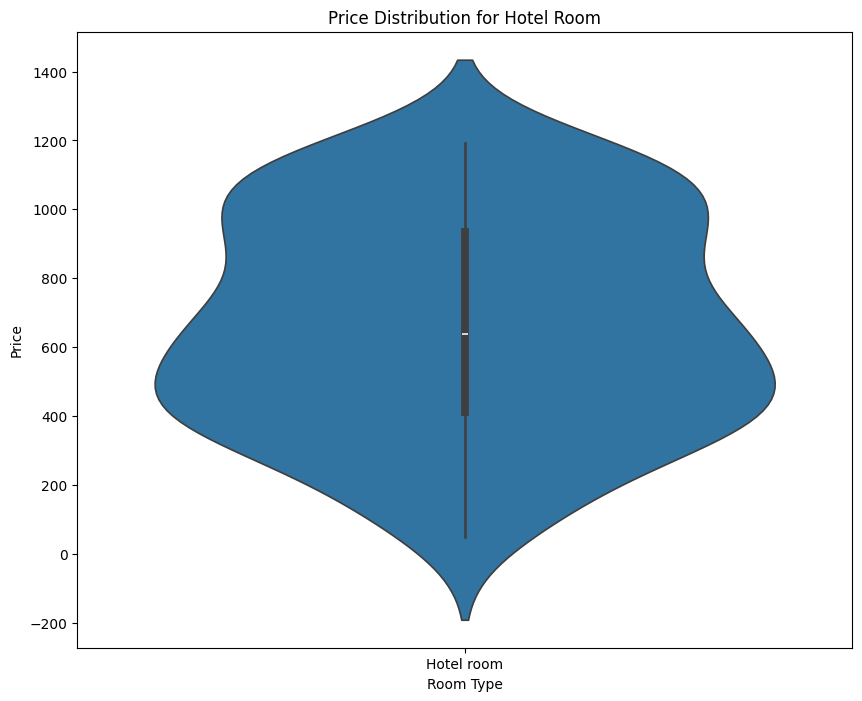

In [108]:
# Filtra i dati solo per l'hotel room che vuoi analizzare
hotel_room_data = airbnb_df[airbnb_df['room_type'] == 'Hotel room']

# Crea il violin plot
plt.figure(figsize=(10, 8))
sns.violinplot(x='room_type', y='price', data=hotel_room_data)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.title('Price Distribution for Hotel Room')
plt.show()


vedoc he appunto non ci sono outliers, il violin plot è simmetrico quindi la distribuzione die dati è bilanciatae quidni anche i prezzi e osservo che la maggiore densità dei dati si ha tra 400 e 600 dollari al girono

In [109]:
#prezzo pi+ù alto per neighbourhood
max_price_neighbourhood = airbnb_df.groupby('neighbourhood')['price'].max()
most_expensive_neighbourhood = max_price_neighbourhood.idxmax()
price_of_most_expensive = max_price_neighbourhood.max()
print(f'The most expensive neighbourhood of New York riguardo agli Airbnbs è: {most_expensive_neighbourhood}')
print(f'il prezzo più alto è: {price_of_most_expensive}')

The most expensive neighbourhood of New York riguardo agli Airbnbs è: Astoria
il prezzo più alto è: 1200.0


poi faccio anche quello con prezzo piu basso e faccio subplot con i due grafici